1. Importación de Bibliotecas

In [10]:
# Bibliotecas básicas para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

# Para análisis estadístico
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Para análisis de series temporales
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from datetime import datetime, timedelta

# Para ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Para visualizaciones interactivas (opcional)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    plotly_available = True
except ImportError:
    plotly_available = False
    print("Plotly no está instalado. Las visualizaciones interactivas no estarán disponibles.")

# Para guardar modelos
import pickle
import joblib

# Para configurar la visualización de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Bibliotecas importadas correctamente para análisis de series temporales y modelado ARIMAX.")

Bibliotecas importadas correctamente para análisis de series temporales y modelado ARIMAX.


2. Carga de Datos

In [3]:
# Definir rutas de los archivos
ruta_base = "data/"
ruta_defensas = ruta_base + "Defensas_Unificados.csv"
ruta_goleadores = ruta_base + "Goleadores_Unificados.csv"
ruta_porteros = ruta_base + "Porteros_Unificados.csv"

# Cargar datasets
try:
    # Intentar cargar con codificación UTF-8
    df_defensas = pd.read_csv(ruta_defensas, encoding='utf-8')
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='utf-8')
    df_porteros = pd.read_csv(ruta_porteros, encoding='utf-8')
    print("Archivos cargados correctamente con codificación UTF-8.")
except UnicodeDecodeError:
    # Si falla, intentar con latin-1
    df_defensas = pd.read_csv(ruta_defensas, encoding='latin-1')
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='latin-1')
    df_porteros = pd.read_csv(ruta_porteros, encoding='latin-1')
    print("Archivos cargados correctamente con codificación latin-1.")

# Información básica sobre los datasets
print("\n--- INFORMACIÓN DE LOS DATASETS ---")

print("\nDataset de Defensas:")
print(f"Número de filas: {df_defensas.shape[0]}")
print(f"Número de columnas: {df_defensas.shape[1]}")

print("\nDataset de Goleadores:")
print(f"Número de filas: {df_goleadores.shape[0]}")
print(f"Número de columnas: {df_goleadores.shape[1]}")

print("\nDataset de Porteros:")
print(f"Número de filas: {df_porteros.shape[0]}")
print(f"Número de columnas: {df_porteros.shape[1]}")

# Mostrar las primeras filas de cada dataset
print("\n--- PRIMERAS FILAS DE CADA DATASET ---")

print("\nDataset de Defensas (primeras 3 filas):")
display(df_defensas.head(3))

print("\nDataset de Goleadores (primeras 3 filas):")
display(df_goleadores.head(3))

print("\nDataset de Porteros (primeras 3 filas):")
display(df_porteros.head(3))

# Información sobre los tipos de datos
print("\n--- TIPOS DE DATOS EN CADA DATASET ---")

print("\nTipos de datos en Dataset de Defensas:")
display(df_defensas.dtypes)

print("\nTipos de datos en Dataset de Goleadores:")
display(df_goleadores.dtypes)

print("\nTipos de datos en Dataset de Porteros:")
display(df_porteros.dtypes)

# Verificar valores nulos
print("\n--- VALORES NULOS EN CADA DATASET ---")

print("\nValores nulos en Dataset de Defensas:")
display(df_defensas.isnull().sum())

print("\nValores nulos en Dataset de Goleadores:")
display(df_goleadores.isnull().sum())

print("\nValores nulos en Dataset de Porteros:")
display(df_porteros.isnull().sum())

Archivos cargados correctamente con codificación UTF-8.

--- INFORMACIÓN DE LOS DATASETS ---

Dataset de Defensas:
Número de filas: 550
Número de columnas: 31

Dataset de Goleadores:
Número de filas: 662
Número de columnas: 31

Dataset de Porteros:
Número de filas: 647
Número de columnas: 23

--- PRIMERAS FILAS DE CADA DATASET ---

Dataset de Defensas (primeras 3 filas):


,Jugador,Temporada,Fecha,Competición,Equipo,Oponente,Resultado,Goles,Asistencias,partido,Día de la semana,Ronda o Fase,Sede,Titular,Posición,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos
0,Didider_Moreno,2022,2022-01-22,Primera A,Junior,Boyacá Patriot,W 3–1,0,0,1,Sat,Apertura — First stage,Home,Y,DM,73,0,0,0,0,0,0,2,0,0,0,2,2,0,0,0
1,Didider_Moreno,2022,2022-01-26,Primera A,Junior,Nacional,L 1–3,0,0,2,Wed,Apertura — First stage,Away,Y,DM,56,0,0,1,0,1,0,1,1,0,0,4,1,1,0,0
2,Didider_Moreno,2022,2022-01-29,Primera A,Junior,La Equidad,W 1–0,0,0,3,Sat,Apertura — First stage,Home,Y,DM,76,0,0,1,1,0,0,2,4,0,0,1,3,0,0,0



Dataset de Goleadores (primeras 3 filas):


,Jugador,Temporada,Fecha,Competición,Equipo,Oponente,Resultado,Goles,Asistencias,partido,Día de la semana,Ronda o Fase,Sede,Titular,Posición,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos
0,Carlos_Bacca,2022,2022-01-08,La Liga,Granada,Barcelona,D 1–1,0,0,1,Sat,Matchweek 20,Home,N,FW,7,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0
1,Carlos_Bacca,2022,2022-01-20,La Liga,Granada,Getafe,L 2–4,0,0,2,Thu,Matchweek 21,Away,N,RM,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Carlos_Bacca,2022,2022-01-23,La Liga,Granada,Osasuna,L 0–2,0,0,3,Sun,Matchweek 22,Home,N,LW,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0



Dataset de Porteros (primeras 3 filas):


,Portero,Temporada,Fecha,Competición,Equipo,Oponente,Resultado,Tiros a puerta recibidos,Goles encajados,Paradas,Porcentaje de paradas,Porterías a cero,Penales recibidos,Penales permitidos,Penales atajados,Penales fallados,partido,Día de la semana,Ronda o Fase,Sede,Titular,Posición,Minutos
0,Alvaro_Montero,2022,2022-01-21,Primera A,Millonarios,Pasto,W 1–0,0,0,1,0.00,1,1,0,1,0,1,Fri,Apertura — First stage,Away,Y,GK,90
1,Alvaro_Montero,2022,2022-01-25,Primera A,Millonarios,CA Bucaramanga,D 0–0,2,0,2,1.00,1,0,0,0,0,2,Tue,Apertura — First stage,Away,Y,GK,90
2,Alvaro_Montero,2022,2022-01-29,Primera A,Millonarios,Nacional,L 0–2,6,2,4,0.67,0,0,0,0,0,3,Sat,Apertura — First stage,Home,Y,GK,90



--- TIPOS DE DATOS EN CADA DATASET ---

Tipos de datos en Dataset de Defensas:


Jugador               object
Temporada              int64
Fecha                 object
Competición           object
Equipo                object
Oponente              object
Resultado             object
Goles                  int64
Asistencias            int64
partido                int64
Día de la semana      object
Ronda o Fase          object
Sede                  object
Titular               object
Posición              object
Minutos                int64
Penales marcados       int64
Penales intentados     int64
Tiros totales          int64
Tiros a puerta         int64
Tarjetas amarillas     int64
Tarjetas rojas         int64
Faltas cometidas       int64
Faltas recibidas       int64
Fuera de juego         int64
Centros                int64
Entradas ganadas       int64
Intercepciones         int64
Goles en propia        int64
Penales ganados        int64
Penales concedidos     int64
dtype: object


Tipos de datos en Dataset de Goleadores:


Jugador               object
Temporada              int64
Fecha                 object
Competición           object
Equipo                object
Oponente              object
Resultado             object
Goles                  int64
Asistencias            int64
partido                int64
Día de la semana      object
Ronda o Fase          object
Sede                  object
Titular               object
Posición              object
Minutos                int64
Penales marcados       int64
Penales intentados     int64
Tiros totales          int64
Tiros a puerta         int64
Tarjetas amarillas     int64
Tarjetas rojas         int64
Faltas cometidas       int64
Faltas recibidas       int64
Fuera de juego         int64
Centros                int64
Entradas ganadas       int64
Intercepciones         int64
Goles en propia        int64
Penales ganados        int64
Penales concedidos     int64
dtype: object


Tipos de datos en Dataset de Porteros:


Portero                      object
Temporada                     int64
Fecha                        object
Competición                  object
Equipo                       object
Oponente                     object
Resultado                    object
Tiros a puerta recibidos      int64
Goles encajados               int64
Paradas                       int64
Porcentaje de paradas       float64
Porterías a cero              int64
Penales recibidos             int64
Penales permitidos            int64
Penales atajados              int64
Penales fallados              int64
partido                       int64
Día de la semana             object
Ronda o Fase                 object
Sede                         object
Titular                      object
Posición                     object
Minutos                       int64
dtype: object


--- VALORES NULOS EN CADA DATASET ---

Valores nulos en Dataset de Defensas:


Jugador                0
Temporada              0
Fecha                  0
Competición            0
Equipo                 0
Oponente               0
Resultado              0
Goles                  0
Asistencias            0
partido                0
Día de la semana       0
Ronda o Fase           0
Sede                   0
Titular                0
Posición              21
Minutos                0
Penales marcados       0
Penales intentados     0
Tiros totales          0
Tiros a puerta         0
Tarjetas amarillas     0
Tarjetas rojas         0
Faltas cometidas       0
Faltas recibidas       0
Fuera de juego         0
Centros                0
Entradas ganadas       0
Intercepciones         0
Goles en propia        0
Penales ganados        0
Penales concedidos     0
dtype: int64


Valores nulos en Dataset de Goleadores:


Jugador                0
Temporada              0
Fecha                  0
Competición            0
Equipo                 0
Oponente               0
Resultado              0
Goles                  0
Asistencias            0
partido                0
Día de la semana       0
Ronda o Fase           0
Sede                   0
Titular                0
Posición              83
Minutos                0
Penales marcados       0
Penales intentados     0
Tiros totales          0
Tiros a puerta         0
Tarjetas amarillas     0
Tarjetas rojas         0
Faltas cometidas       0
Faltas recibidas       0
Fuera de juego         0
Centros                0
Entradas ganadas       0
Intercepciones         0
Goles en propia        0
Penales ganados        0
Penales concedidos     0
dtype: int64


Valores nulos en Dataset de Porteros:


Portero                     0
Temporada                   0
Fecha                       0
Competición                 0
Equipo                      0
Oponente                    0
Resultado                   0
Tiros a puerta recibidos    0
Goles encajados             0
Paradas                     0
Porcentaje de paradas       0
Porterías a cero            0
Penales recibidos           0
Penales permitidos          0
Penales atajados            0
Penales fallados            0
partido                     0
Día de la semana            0
Ronda o Fase                0
Sede                        0
Titular                     0
Posición                    0
Minutos                     0
dtype: int64

3. Limpieza de Datos

In [4]:
# Función para mostrar información resumida de un DataFrame
def mostrar_info_resumida(df, nombre):
    print(f"\n----- Resumen de {nombre} -----")
    print(f"Dimensiones: {df.shape}")
    print("\nColumnas únicas:")
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"{col}: {df[col].nunique()} valores únicos")
    
    print("\nEstadísticas descriptivas para columnas numéricas:")
    display(df.describe())

# Limpieza del DataFrame de Defensas
def limpiar_defensas(df):
    df_limpio = df.copy()
    
    # Manejo de valores nulos en la columna 'Posición'
    if df_limpio['Posición'].isnull().sum() > 0:
        # Rellenar con 'Defensa' ya que estamos en el dataset de defensas
        df_limpio['Posición'].fillna('Defensa', inplace=True)
    
    # Convertir fechas a formato datetime
    df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'], errors='coerce')
    
    # Crear columna de año y mes para facilitar análisis temporales
    df_limpio['Año'] = df_limpio['Fecha'].dt.year
    df_limpio['Mes'] = df_limpio['Fecha'].dt.month
    
    # Estandarizar nombres de equipos y oponentes (convertir a mayúsculas)
    df_limpio['Equipo'] = df_limpio['Equipo'].str.upper()
    df_limpio['Oponente'] = df_limpio['Oponente'].str.upper()
    
    # Crear columna de eficiencia defensiva (intercepciones + entradas ganadas - goles en propia)
    df_limpio['Eficiencia_Defensiva'] = df_limpio['Intercepciones'] + df_limpio['Entradas ganadas'] - df_limpio['Goles en propia']
    
    return df_limpio

# Limpieza del DataFrame de Goleadores
def limpiar_goleadores(df):
    df_limpio = df.copy()
    
    # Manejo de valores nulos en la columna 'Posición'
    if df_limpio['Posición'].isnull().sum() > 0:
        # Rellenar con 'Delantero' ya que estamos en el dataset de goleadores
        df_limpio['Posición'].fillna('Delantero', inplace=True)
    
    # Convertir fechas a formato datetime
    df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'], errors='coerce')
    
    # Crear columna de año y mes para facilitar análisis temporales
    df_limpio['Año'] = df_limpio['Fecha'].dt.year
    df_limpio['Mes'] = df_limpio['Fecha'].dt.month
    
    # Estandarizar nombres de equipos y oponentes
    df_limpio['Equipo'] = df_limpio['Equipo'].str.upper()
    df_limpio['Oponente'] = df_limpio['Oponente'].str.upper()
    
    # Crear columna de eficiencia ofensiva (goles / tiros totales)
    # Evitar división por cero
    df_limpio['Eficiencia_Ofensiva'] = np.where(
        df_limpio['Tiros totales'] > 0,
        df_limpio['Goles'] / df_limpio['Tiros totales'],
        0
    )
    
    return df_limpio

# Limpieza del DataFrame de Porteros
def limpiar_porteros(df):
    df_limpio = df.copy()
    
    # Convertir fechas a formato datetime
    df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'], errors='coerce')
    
    # Crear columna de año y mes para facilitar análisis temporales
    df_limpio['Año'] = df_limpio['Fecha'].dt.year
    df_limpio['Mes'] = df_limpio['Fecha'].dt.month
    
    # Estandarizar nombres de equipos y oponentes
    df_limpio['Equipo'] = df_limpio['Equipo'].str.upper()
    df_limpio['Oponente'] = df_limpio['Oponente'].str.upper()
    
    # Asegurarse de que 'Porterías a cero' es numérico
    if 'Porterías a cero' in df_limpio.columns:
        df_limpio['Porterías a cero'] = pd.to_numeric(df_limpio['Porterías a cero'], errors='coerce').fillna(0).astype(int)
    
    return df_limpio

# Aplicar limpieza a cada DataFrame
df_defensas_limpio = limpiar_defensas(df_defensas)
df_goleadores_limpio = limpiar_goleadores(df_goleadores)
df_porteros_limpio = limpiar_porteros(df_porteros)

# Mostrar información resumida de cada DataFrame limpio
mostrar_info_resumida(df_defensas_limpio, "Defensas limpio")
mostrar_info_resumida(df_goleadores_limpio, "Goleadores limpio")
mostrar_info_resumida(df_porteros_limpio, "Porteros limpio")

# Verificar que no queden valores nulos en columnas importantes
print("\n----- Verificación final de valores nulos -----")
print("\nValores nulos en DataFrame de Defensas limpio:")
print(df_defensas_limpio.isnull().sum()[df_defensas_limpio.isnull().sum() > 0])

print("\nValores nulos en DataFrame de Goleadores limpio:")
print(df_goleadores_limpio.isnull().sum()[df_goleadores_limpio.isnull().sum() > 0])

print("\nValores nulos en DataFrame de Porteros limpio:")
print(df_porteros_limpio.isnull().sum()[df_porteros_limpio.isnull().sum() > 0])


----- Resumen de Defensas limpio -----
Dimensiones: (550, 34)

Columnas únicas:
Jugador: 5 valores únicos
Competición: 9 valores únicos
Equipo: 10 valores únicos
Oponente: 63 valores únicos
Resultado: 33 valores únicos
Día de la semana: 7 valores únicos
Ronda o Fase: 15 valores únicos
Sede: 3 valores únicos
Titular: 3 valores únicos
Posición: 7 valores únicos

Estadísticas descriptivas para columnas numéricas:


,Temporada,Fecha,Goles,Asistencias,partido,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos,Año,Mes,Eficiencia_Defensiva
count,550.00,550,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00
mean,2023.36,2023-10-21 05:32:30.545454592,0.06,0.02,22.16,84.54,0.00,0.00,0.61,0.20,0.20,0.01,0.91,0.55,0.04,0.10,1.02,1.20,0.01,0.00,0.00,2023.36,5.87,2.20
min,2022.00,2022-01-21 00:00:00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,1.00,0.00
25%,2023.00,2023-03-31 06:00:00,0.00,0.00,10.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023.00,3.00,1.00
50%,2023.00,2023-10-20 12:00:00,0.00,0.00,21.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,2023.00,5.00,2.00
75%,2024.00,2024-07-17 00:00:00,0.00,0.00,33.00,90.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,2024.00,9.00,3.00
max,2025.00,2025-04-11 00:00:00,2.00,1.00,55.00,120.00,1.00,1.00,5.00,3.00,2.00,1.00,7.00,5.00,2.00,2.00,6.00,7.00,1.00,0.00,0.00,2025.00,12.00,9.00
std,0.86,NaN,0.26,0.13,13.99,15.70,0.04,0.04,0.87,0.46,0.41,0.12,1.08,0.88,0.21,0.33,1.12,1.28,0.11,0.00,0.00,0.86,3.22,1.85



----- Resumen de Goleadores limpio -----
Dimensiones: (662, 34)

Columnas únicas:
Jugador: 5 valores únicos
Competición: 6 valores únicos
Equipo: 14 valores únicos
Oponente: 68 valores únicos
Resultado: 34 valores únicos
Día de la semana: 7 valores únicos
Ronda o Fase: 34 valores únicos
Sede: 2 valores únicos
Titular: 3 valores únicos
Posición: 8 valores únicos

Estadísticas descriptivas para columnas numéricas:


,Temporada,Fecha,Goles,Asistencias,partido,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos,Año,Mes,Eficiencia_Ofensiva
count,662.00,662,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00
mean,2023.25,2023-09-23 12:19:34.622356480,0.42,0.08,21.12,73.76,0.10,0.12,2.68,1.08,0.16,0.01,0.52,0.77,0.52,0.43,0.17,0.12,0.00,0.00,0.00,2023.25,6.27,0.14
min,2022.00,2022-01-08 00:00:00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,1.00,0.00
25%,2022.00,2022-12-04 18:00:00,0.00,0.00,10.00,67.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,3.00,0.00
50%,2023.00,2023-09-23 00:00:00,0.00,0.00,20.00,84.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023.00,6.00,0.00
75%,2024.00,2024-05-25 18:00:00,1.00,0.00,32.00,90.00,0.00,0.00,4.00,2.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2024.00,9.00,0.25
max,2025.00,2025-04-10 00:00:00,4.00,2.00,53.00,120.00,1.00,2.00,12.00,6.00,2.00,1.00,6.00,5.00,9.00,4.00,2.00,3.00,0.00,0.00,0.00,2025.00,12.00,1.00
std,0.92,NaN,0.64,0.29,13.27,23.50,0.30,0.33,1.98,1.11,0.37,0.09,0.80,0.98,0.86,0.75,0.43,0.37,0.00,0.00,0.00,0.92,3.33,0.24



----- Resumen de Porteros limpio -----
Dimensiones: (647, 25)

Columnas únicas:
Portero: 5 valores únicos
Competición: 8 valores únicos
Equipo: 16 valores únicos
Oponente: 86 valores únicos
Resultado: 35 valores únicos
Día de la semana: 7 valores únicos
Ronda o Fase: 40 valores únicos
Sede: 3 valores únicos
Titular: 3 valores únicos
Posición: 1 valores únicos

Estadísticas descriptivas para columnas numéricas:


,Temporada,Fecha,Tiros a puerta recibidos,Goles encajados,Paradas,Porcentaje de paradas,Porterías a cero,Penales recibidos,Penales permitidos,Penales atajados,Penales fallados,partido,Minutos,Año,Mes
count,647.00,647,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00
mean,2023.25,2023-09-17 07:09:33.106646016,3.63,0.93,2.84,0.72,0.37,0.15,0.11,0.03,0.00,20.89,88.58,2023.25,6.05
min,2022.00,2022-01-16 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2022.00,1.00
25%,2022.00,2022-11-12 12:00:00,2.00,0.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00,9.00,90.00,2022.00,3.00
50%,2023.00,2023-09-15 00:00:00,3.00,1.00,2.00,0.80,0.00,0.00,0.00,0.00,0.00,19.00,90.00,2023.00,5.00
75%,2024.00,2024-07-16 00:00:00,5.00,1.00,4.00,1.00,1.00,0.00,0.00,0.00,0.00,31.00,90.00,2024.00,9.00
max,2025.00,2025-04-10 00:00:00,12.00,5.00,10.00,1.00,1.00,2.00,2.00,2.00,1.00,53.00,120.00,2025.00,12.00
std,0.95,NaN,2.24,0.95,1.98,0.31,0.48,0.39,0.34,0.19,0.07,13.53,10.59,0.95,3.33



----- Verificación final de valores nulos -----

Valores nulos en DataFrame de Defensas limpio:
Series([], dtype: int64)

Valores nulos en DataFrame de Goleadores limpio:
Series([], dtype: int64)

Valores nulos en DataFrame de Porteros limpio:
Series([], dtype: int64)


4. Transformación de Datos

In [5]:
# Funciones para transformar y enriquecer los datos

def crear_metricas_avanzadas_defensas(df):
    """Crear métricas avanzadas para defensas"""
    df_transformado = df.copy()
    
    # Minutos jugados por partido
    df_transformado['Minutos_por_Partido'] = df_transformado['Minutos'] / df_transformado['partido']
    
    # Índice de contribución defensiva 
    # (combina entradas, intercepciones y penales evitados, normalizado por partidos)
    df_transformado['Indice_Defensa'] = (
        df_transformado['Entradas ganadas'] * 1.5 + 
        df_transformado['Intercepciones'] * 1.2 - 
        df_transformado['Penales concedidos'] * 3 -
        df_transformado['Goles en propia'] * 2
    ) / df_transformado['partido']
    
    # Índice de disciplina 
    # (inversamente proporcional a las tarjetas)
    df_transformado['Indice_Disciplina'] = 10 - (
        df_transformado['Tarjetas amarillas'] * 1 + 
        df_transformado['Tarjetas rojas'] * 3
    ) / df_transformado['partido']
    df_transformado['Indice_Disciplina'] = df_transformado['Indice_Disciplina'].clip(lower=0)
    
    # Índice de contribución ofensiva para defensas
    df_transformado['Indice_Ofensivo_Defensa'] = (
        df_transformado['Goles'] * 3 + 
        df_transformado['Asistencias'] * 2 + 
        df_transformado['Centros'] * 0.5
    ) / df_transformado['partido']
    
    # Índice de participación en juego
    df_transformado['Indice_Participacion'] = (
        df_transformado['Minutos'] / 
        (df_transformado['partido'] * 90)  # Asumiendo partidos de 90 minutos
    ) * 10
    
    # Score global de defensa (combinación ponderada de los índices anteriores)
    df_transformado['Score_Global_Defensa'] = (
        df_transformado['Indice_Defensa'] * 0.5 + 
        df_transformado['Indice_Disciplina'] * 0.2 + 
        df_transformado['Indice_Ofensivo_Defensa'] * 0.15 + 
        df_transformado['Indice_Participacion'] * 0.15
    )
    
    return df_transformado

def crear_metricas_avanzadas_goleadores(df):
    """Crear métricas avanzadas para goleadores"""
    df_transformado = df.copy()
    
    # Minutos jugados por partido
    df_transformado['Minutos_por_Partido'] = df_transformado['Minutos'] / df_transformado['partido']
    
    # Goles por partido
    df_transformado['Goles_por_Partido'] = df_transformado['Goles'] / df_transformado['partido']
    
    # Goles por 90 minutos
    df_transformado['Goles_por_90min'] = df_transformado['Goles'] / (df_transformado['Minutos'] / 90)
    # Corregir infinitos o NaN
    df_transformado['Goles_por_90min'] = df_transformado['Goles_por_90min'].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Eficiencia de tiro (porcentaje de tiros que son gol)
    df_transformado['Eficiencia_Tiro'] = np.where(
        df_transformado['Tiros totales'] > 0,
        df_transformado['Goles'] / df_transformado['Tiros totales'] * 100,
        0
    )
    
    # Precisión de tiro (porcentaje de tiros que van a puerta)
    df_transformado['Precision_Tiro'] = np.where(
        df_transformado['Tiros totales'] > 0,
        df_transformado['Tiros a puerta'] / df_transformado['Tiros totales'] * 100,
        0
    )
    
    # Índice de contribución ofensiva
    df_transformado['Indice_Ofensivo'] = (
        df_transformado['Goles'] * 3 + 
        df_transformado['Asistencias'] * 2 + 
        df_transformado['Penales ganados'] * 1 +
        df_transformado['Tiros a puerta'] * 0.2
    ) / df_transformado['partido']
    
    # Índice de disciplina
    df_transformado['Indice_Disciplina'] = 10 - (
        df_transformado['Tarjetas amarillas'] * 1 + 
        df_transformado['Tarjetas rojas'] * 3
    ) / df_transformado['partido']
    df_transformado['Indice_Disciplina'] = df_transformado['Indice_Disciplina'].clip(lower=0)
    
    # Índice de participación en juego
    df_transformado['Indice_Participacion'] = (
        df_transformado['Minutos'] / 
        (df_transformado['partido'] * 90)  # Asumiendo partidos de 90 minutos
    ) * 10
    
    # Score global de ataque
    df_transformado['Score_Global_Ataque'] = (
        df_transformado['Indice_Ofensivo'] * 0.6 + 
        df_transformado['Indice_Disciplina'] * 0.1 + 
        df_transformado['Indice_Participacion'] * 0.3
    )
    
    return df_transformado

def crear_metricas_avanzadas_porteros(df):
    """Crear métricas avanzadas para porteros"""
    df_transformado = df.copy()
    
    # Goles encajados por partido
    if 'Goles encajados' in df_transformado.columns and 'partido' in df_transformado.columns:
        df_transformado['Goles_Encajados_por_Partido'] = df_transformado['Goles encajados'] / df_transformado['partido']
    
    # Porterías a cero por partido
    if 'Porterías a cero' in df_transformado.columns and 'partido' in df_transformado.columns:
        df_transformado['Porterias_Cero_por_Partido'] = df_transformado['Porterías a cero'] / df_transformado['partido']
    
    # Índice de atajadas (paradas - goles encajados)
    if 'Paradas' in df_transformado.columns and 'Goles encajados' in df_transformado.columns:
        df_transformado['Indice_Atajadas'] = df_transformado['Paradas'] - df_transformado['Goles encajados']
    
    # Eficiencia de penales (% de penales atajados)
    if 'Penales atajados' in df_transformado.columns and 'Penales recibidos' in df_transformado.columns:
        df_transformado['Eficiencia_Penales'] = np.where(
            df_transformado['Penales recibidos'] > 0,
            df_transformado['Penales atajados'] / df_transformado['Penales recibidos'] * 100,
            0
        )
    
    # Score de portero (combinación ponderada de métricas clave)
    if all(col in df_transformado.columns for col in 
           ['Porterías a cero', 'Paradas', 'Goles encajados', 'Penales atajados', 'partido']):
        df_transformado['Score_Portero'] = (
            (df_transformado['Porterías a cero'] / df_transformado['partido'] * 50) +
            (df_transformado['Paradas'] / df_transformado['partido'] * 0.5) -
            (df_transformado['Goles encajados'] / df_transformado['partido'] * 15) +
            (df_transformado['Penales atajados'] * 5)
        )
    
    return df_transformado

# Aplicar transformaciones
df_defensas_transformado = crear_metricas_avanzadas_defensas(df_defensas_limpio)
df_goleadores_transformado = crear_metricas_avanzadas_goleadores(df_goleadores_limpio)
df_porteros_transformado = crear_metricas_avanzadas_porteros(df_porteros_limpio)

# Mostrar las nuevas métricas creadas
print("\n----- Nuevas métricas para Defensas -----")
cols_nuevas_defensas = ['Minutos_por_Partido', 'Indice_Defensa', 'Indice_Disciplina', 
                        'Indice_Ofensivo_Defensa', 'Indice_Participacion', 'Score_Global_Defensa']
display(df_defensas_transformado[cols_nuevas_defensas].describe())

print("\n----- Nuevas métricas para Goleadores -----")
cols_nuevas_goleadores = ['Goles_por_Partido', 'Goles_por_90min', 'Eficiencia_Tiro', 
                          'Precision_Tiro', 'Indice_Ofensivo', 'Score_Global_Ataque']
display(df_goleadores_transformado[cols_nuevas_goleadores].describe())

print("\n----- Nuevas métricas para Porteros -----")
cols_nuevas_porteros = [col for col in ['Goles_Encajados_por_Partido', 'Porterias_Cero_por_Partido', 
                                         'Indice_Atajadas', 'Eficiencia_Penales', 'Score_Portero'] 
                        if col in df_porteros_transformado.columns]
if cols_nuevas_porteros:
    display(df_porteros_transformado[cols_nuevas_porteros].describe())
else:
    print("No se pudieron crear métricas nuevas para porteros debido a columnas faltantes")

# Guardar los datasets transformados
df_defensas_transformado.to_csv("Defensas_Procesados.csv", index=False)
df_goleadores_transformado.to_csv("Goleadores_Procesados.csv", index=False)
df_porteros_transformado.to_csv("Porteros_Procesados.csv", index=False)

print("\nLos datasets transformados han sido guardados como archivos CSV.")


----- Nuevas métricas para Defensas -----


,Minutos_por_Partido,Indice_Defensa,Indice_Disciplina,Indice_Ofensivo_Defensa,Indice_Participacion,Score_Global_Defensa
count,550.00,550.00,550.00,550.00,550.00,550.00
mean,8.84,0.31,9.98,0.02,0.98,2.30
std,14.42,0.68,0.11,0.16,1.60,0.55
min,0.40,-0.04,8.33,0.00,0.04,1.99
25%,2.57,0.04,10.00,0.00,0.29,2.07
50%,3.91,0.12,10.00,0.00,0.43,2.14
75%,8.18,0.30,10.00,0.00,0.91,2.28
max,90.00,8.10,10.00,3.00,10.00,8.00



----- Nuevas métricas para Goleadores -----


,Goles_por_Partido,Goles_por_90min,Eficiencia_Tiro,Precision_Tiro,Indice_Ofensivo,Score_Global_Ataque
count,662.00,662.00,662.00,662.00,662.00,662.00
mean,0.05,0.49,14.41,35.34,0.19,1.38
std,0.16,0.81,24.12,34.58,0.56,0.72
min,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,0.00,1.09
50%,0.00,0.00,0.00,33.33,0.02,1.16
75%,0.04,1.00,25.00,50.00,0.14,1.33
max,2.00,9.00,100.00,100.00,6.60,7.29



----- Nuevas métricas para Porteros -----


,Goles_Encajados_por_Partido,Porterias_Cero_por_Partido,Indice_Atajadas,Eficiencia_Penales,Score_Portero
count,647.00,647.00,647.00,647.00,647.00
mean,0.10,0.04,1.91,2.94,1.02
std,0.26,0.13,2.13,16.90,8.28
min,0.00,0.00,-3.00,0.00,-59.00
25%,0.00,0.00,0.00,0.00,-1.35
50%,0.03,0.00,2.00,0.00,-0.44
75%,0.10,0.04,3.00,0.00,2.09
max,4.00,1.00,10.00,100.00,55.50



Los datasets transformados han sido guardados como archivos CSV.


5. Análisis Exploratorio (Porteros)

Análisis de Porteros - 647 registros


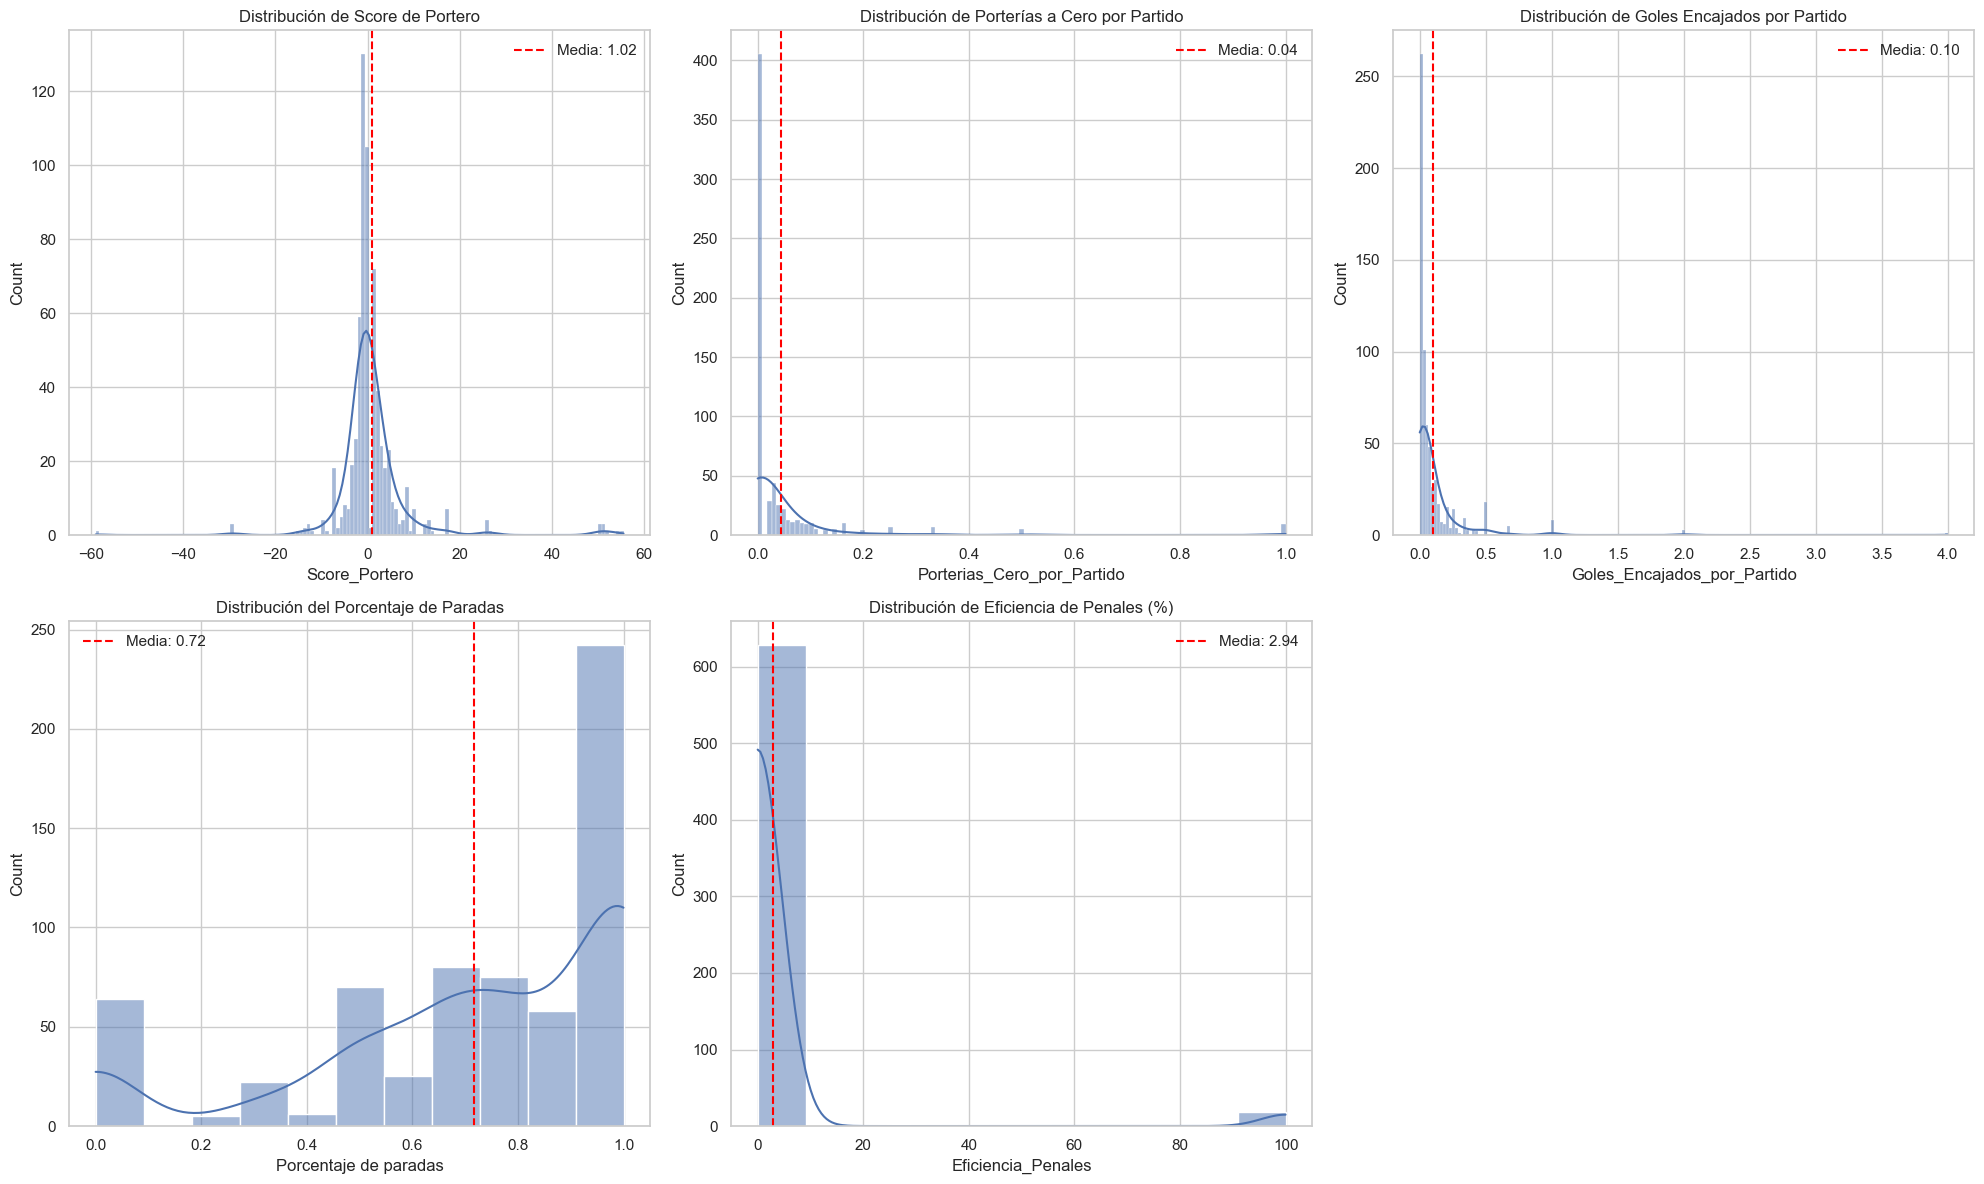

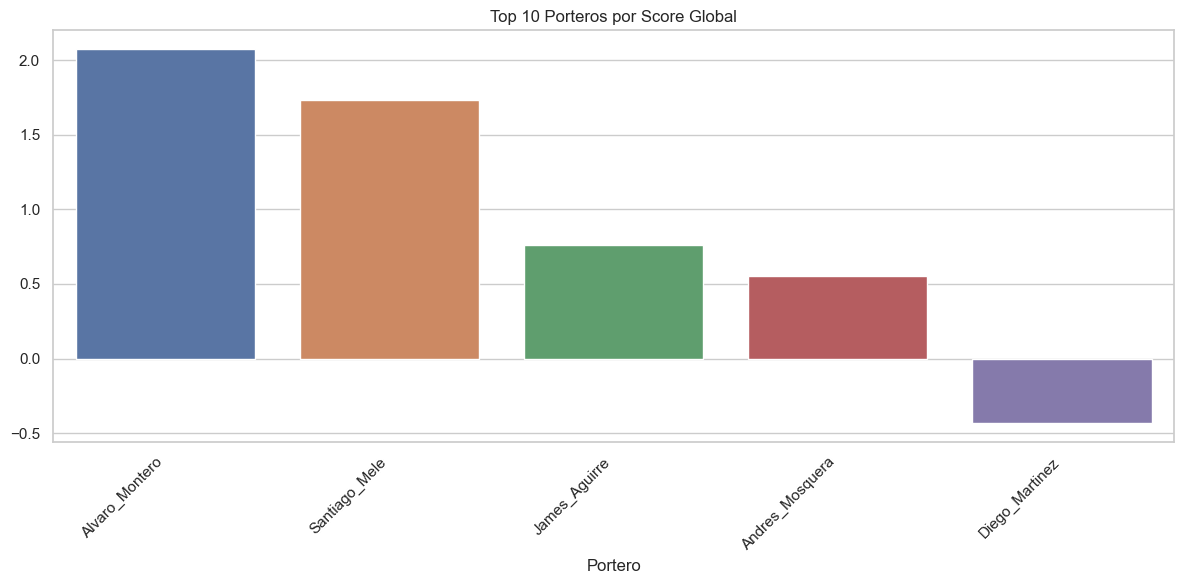

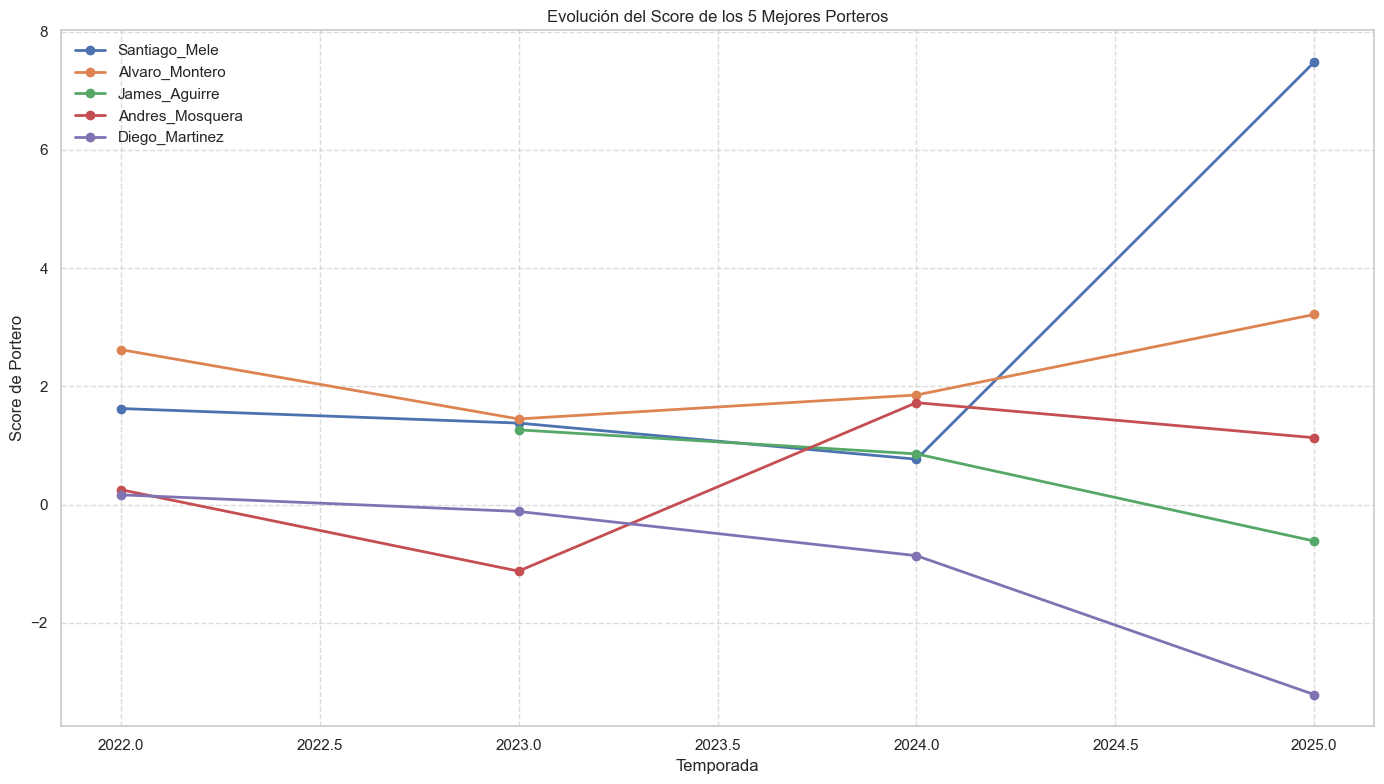

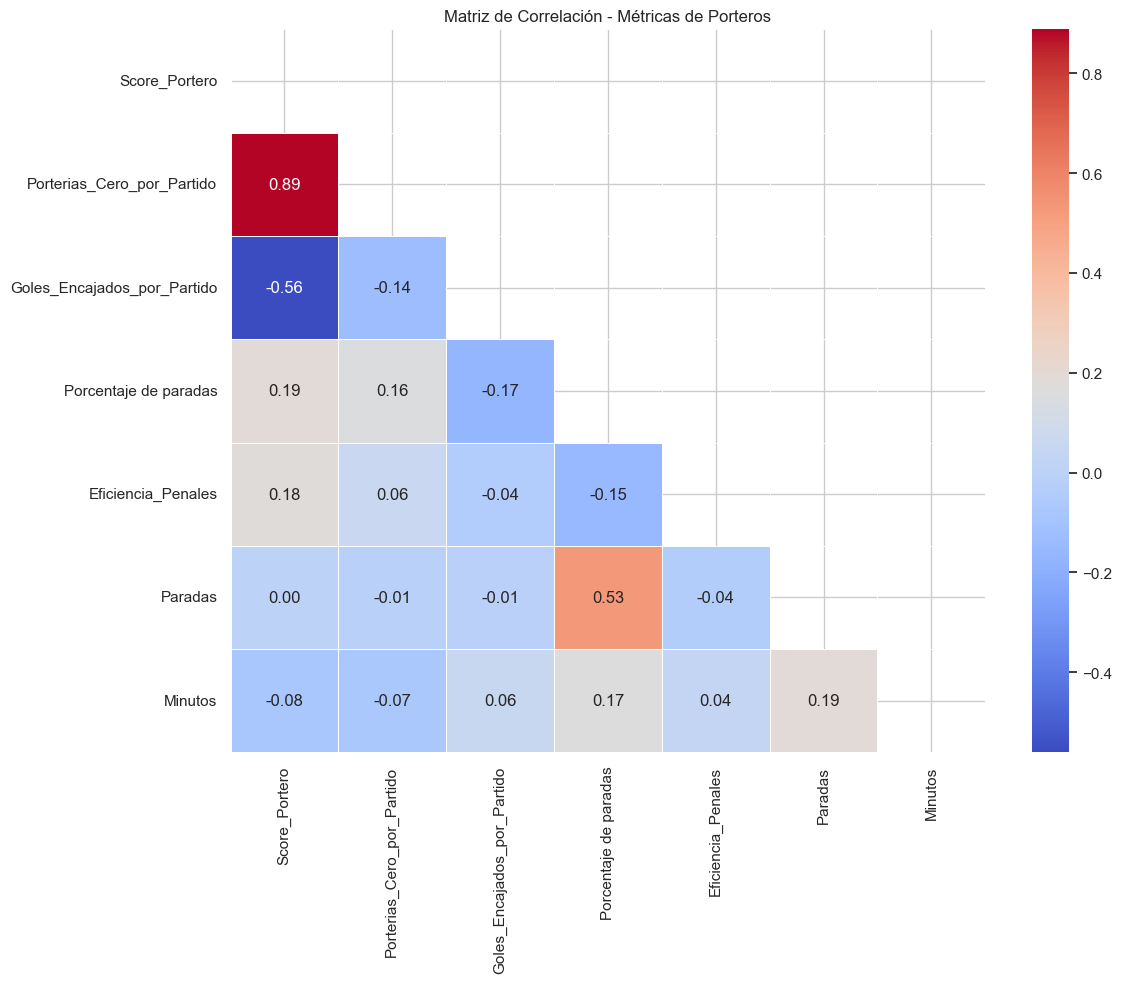

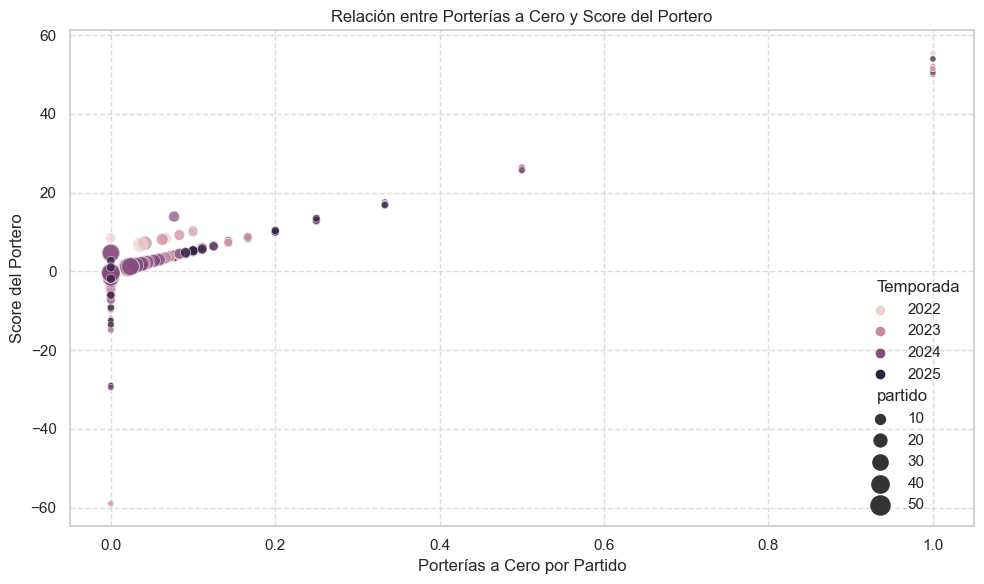

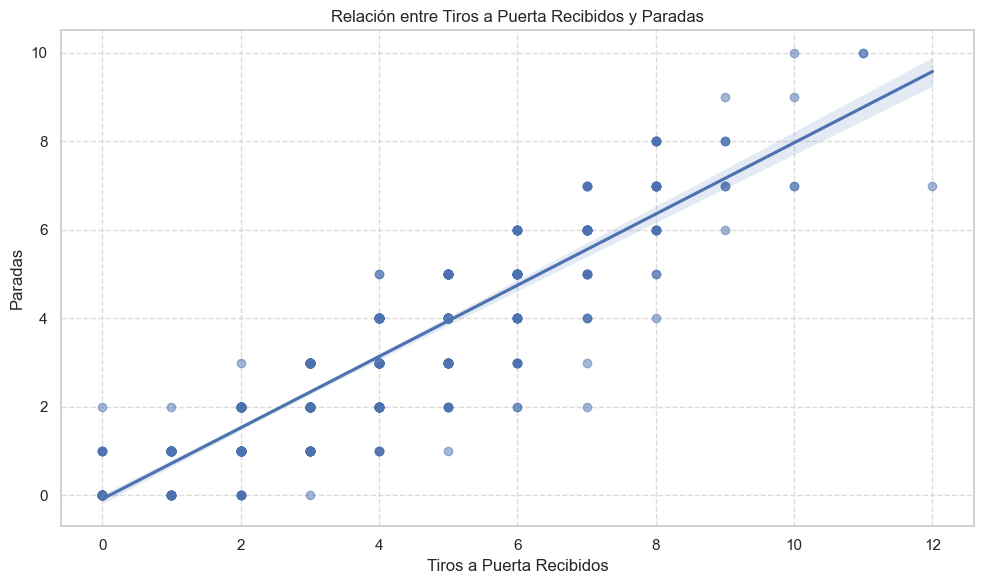


Top 5 Porteros por Score Global:


,Portero,Score_Portero,Porterias_Cero_por_Partido,Goles_Encajados_por_Partido,Porcentaje de paradas,Eficiencia_Penales
0,Alvaro_Montero,2.07,0.06,0.07,0.70,2.48
4,Santiago_Mele,1.73,0.06,0.10,0.70,5.15
3,James_Aguirre,0.76,0.04,0.11,0.73,6.90
1,Andres_Mosquera,0.56,0.03,0.09,0.75,0.70
2,Diego_Martinez,-0.43,0.03,0.15,0.71,0.83



Top 5 Porteros por Porterías a Cero por Partido:


,Portero,Score_Portero,Porterias_Cero_por_Partido,Goles_Encajados_por_Partido,Porcentaje de paradas,Eficiencia_Penales
0,Alvaro_Montero,2.07,0.06,0.07,0.70,2.48
4,Santiago_Mele,1.73,0.06,0.10,0.70,5.15
3,James_Aguirre,0.76,0.04,0.11,0.73,6.90
1,Andres_Mosquera,0.56,0.03,0.09,0.75,0.70
2,Diego_Martinez,-0.43,0.03,0.15,0.71,0.83



Top 5 Porteros por Menor Cantidad de Goles Encajados por Partido:


,Portero,Score_Portero,Porterias_Cero_por_Partido,Goles_Encajados_por_Partido,Porcentaje de paradas,Eficiencia_Penales
0,Alvaro_Montero,2.07,0.06,0.07,0.70,2.48
1,Andres_Mosquera,0.56,0.03,0.09,0.75,0.70
4,Santiago_Mele,1.73,0.06,0.10,0.70,5.15
3,James_Aguirre,0.76,0.04,0.11,0.73,6.90
2,Diego_Martinez,-0.43,0.03,0.15,0.71,0.83



Top 5 Porteros por Porcentaje de Paradas:


,Portero,Score_Portero,Porterias_Cero_por_Partido,Goles_Encajados_por_Partido,Porcentaje de paradas,Eficiencia_Penales
1,Andres_Mosquera,0.56,0.03,0.09,0.75,0.70
3,James_Aguirre,0.76,0.04,0.11,0.73,6.90
2,Diego_Martinez,-0.43,0.03,0.15,0.71,0.83
0,Alvaro_Montero,2.07,0.06,0.07,0.70,2.48
4,Santiago_Mele,1.73,0.06,0.10,0.70,5.15


In [8]:
# Cargar los datos procesados de porteros
df_porteros = pd.read_csv("Porteros_Procesados.csv")

# Crear carpetas para guardar las imágenes
import os
carpeta_imagenes = "data/imagenes"
carpeta_porteros = f"{carpeta_imagenes}/analisis_porteros"
carpeta_defensas = f"{carpeta_imagenes}/analisis_defensas"
carpeta_goleadores = f"{carpeta_imagenes}/analisis_goleadores"
carpeta_comparativo = f"{carpeta_imagenes}/analisis_comparativo"

# Crear las carpetas si no existen
for carpeta in [carpeta_imagenes, carpeta_porteros, carpeta_defensas, carpeta_goleadores, carpeta_comparativo]:
    os.makedirs(carpeta, exist_ok=True)

print(f"Análisis de Porteros - {df_porteros.shape[0]} registros")

# 1. Distribución de métricas clave
plt.figure(figsize=(20, 12))

# Distribución de Score de Portero
plt.subplot(2, 3, 1)
sns.histplot(df_porteros['Score_Portero'], kde=True)
plt.title('Distribución de Score de Portero')
plt.axvline(df_porteros['Score_Portero'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Score_Portero"].mean():.2f}')
plt.legend()

# Distribución de Porterías a cero por partido
plt.subplot(2, 3, 2)
sns.histplot(df_porteros['Porterias_Cero_por_Partido'], kde=True)
plt.title('Distribución de Porterías a Cero por Partido')
plt.axvline(df_porteros['Porterias_Cero_por_Partido'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Porterias_Cero_por_Partido"].mean():.2f}')
plt.legend()

# Distribución de Goles encajados por partido
plt.subplot(2, 3, 3)
sns.histplot(df_porteros['Goles_Encajados_por_Partido'], kde=True)
plt.title('Distribución de Goles Encajados por Partido')
plt.axvline(df_porteros['Goles_Encajados_por_Partido'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Goles_Encajados_por_Partido"].mean():.2f}')
plt.legend()

# Distribución del Porcentaje de paradas
plt.subplot(2, 3, 4)
sns.histplot(df_porteros['Porcentaje de paradas'], kde=True)
plt.title('Distribución del Porcentaje de Paradas')
plt.axvline(df_porteros['Porcentaje de paradas'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Porcentaje de paradas"].mean():.2f}')
plt.legend()

# Distribución de Eficiencia de Penales
plt.subplot(2, 3, 5)
sns.histplot(df_porteros['Eficiencia_Penales'], kde=True)
plt.title('Distribución de Eficiencia de Penales (%)')
plt.axvline(df_porteros['Eficiencia_Penales'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Eficiencia_Penales"].mean():.2f}')
plt.legend()

plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/distribucion_metricas_porteros.png')
plt.show()

# 2. Top 10 porteros por Score_Portero
top_porteros = df_porteros.groupby('Portero')['Score_Portero'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_porteros.index, y=top_porteros.values)
plt.title('Top 10 Porteros por Score Global')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/top10_porteros.png')
plt.show()

# 3. Análisis por temporada
porteros_por_temporada = df_porteros.groupby(['Portero', 'Temporada']).agg({
    'Score_Portero': 'mean',
    'Porterias_Cero_por_Partido': 'mean',
    'Goles_Encajados_por_Partido': 'mean',
    'Porcentaje de paradas': 'mean',
    'partido': 'count'
}).reset_index()

# Filtrar porteros con al menos 10 partidos y mostrar su evolución
porteros_destacados = porteros_por_temporada[porteros_por_temporada['partido'] >= 10]

# 4. Evolución de los mejores 5 porteros a lo largo de las temporadas
mejores_porteros = porteros_por_temporada.groupby('Portero')['Score_Portero'].mean().sort_values(ascending=False).head(5).index.tolist()

plt.figure(figsize=(14, 8))
for portero in mejores_porteros:
    datos = porteros_por_temporada[porteros_por_temporada['Portero'] == portero]
    plt.plot(datos['Temporada'], datos['Score_Portero'], marker='o', linewidth=2, label=portero)

plt.title('Evolución del Score de los 5 Mejores Porteros')
plt.xlabel('Temporada')
plt.ylabel('Score de Portero')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/evolucion_mejores_porteros.png')
plt.show()

# 5. Análisis de correlación
plt.figure(figsize=(12, 10))
cols_corr = ['Score_Portero', 'Porterias_Cero_por_Partido', 'Goles_Encajados_por_Partido', 
             'Porcentaje de paradas', 'Eficiencia_Penales', 'Paradas', 'Minutos']
corr = df_porteros[cols_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Métricas de Porteros')
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/correlacion_porteros.png')
plt.show()

# 6. Relación entre porterías a cero y score del portero
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_porteros, x='Porterias_Cero_por_Partido', y='Score_Portero', 
                hue='Temporada', size='partido', sizes=(20, 200), alpha=0.7)
plt.title('Relación entre Porterías a Cero y Score del Portero')
plt.xlabel('Porterías a Cero por Partido')
plt.ylabel('Score del Portero')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/relacion_porterias_cero_score.png')
plt.show()

# 7. Relación entre tiros recibidos y atajadas
plt.figure(figsize=(10, 6))
sns.regplot(data=df_porteros, x='Tiros a puerta recibidos', y='Paradas', scatter_kws={'alpha':0.5})
plt.title('Relación entre Tiros a Puerta Recibidos y Paradas')
plt.xlabel('Tiros a Puerta Recibidos')
plt.ylabel('Paradas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/relacion_tiros_paradas.png')
plt.show()

# 8. Top 5 porteros por métricas principales
top_metrics = ['Portero', 'Score_Portero', 'Porterias_Cero_por_Partido', 
               'Goles_Encajados_por_Partido', 'Porcentaje de paradas', 'Eficiencia_Penales']

top_porteros_df = df_porteros.groupby('Portero').agg({
    'Score_Portero': 'mean',
    'Porterias_Cero_por_Partido': 'mean',
    'Goles_Encajados_por_Partido': 'mean',
    'Porcentaje de paradas': 'mean',
    'Eficiencia_Penales': 'mean',
    'partido': 'count'
}).reset_index()

# Filtrar porteros con al menos 10 partidos
top_porteros_df = top_porteros_df[top_porteros_df['partido'] >= 10]

print("\nTop 5 Porteros por Score Global:")
display(top_porteros_df.sort_values('Score_Portero', ascending=False)[top_metrics].head(5))

print("\nTop 5 Porteros por Porterías a Cero por Partido:")
display(top_porteros_df.sort_values('Porterias_Cero_por_Partido', ascending=False)[top_metrics].head(5))

print("\nTop 5 Porteros por Menor Cantidad de Goles Encajados por Partido:")
display(top_porteros_df.sort_values('Goles_Encajados_por_Partido')[top_metrics].head(5))

print("\nTop 5 Porteros por Porcentaje de Paradas:")
display(top_porteros_df.sort_values('Porcentaje de paradas', ascending=False)[top_metrics].head(5))

6. Análisis Exploratorio (Defensas)

Análisis de Defensas - 550 registros


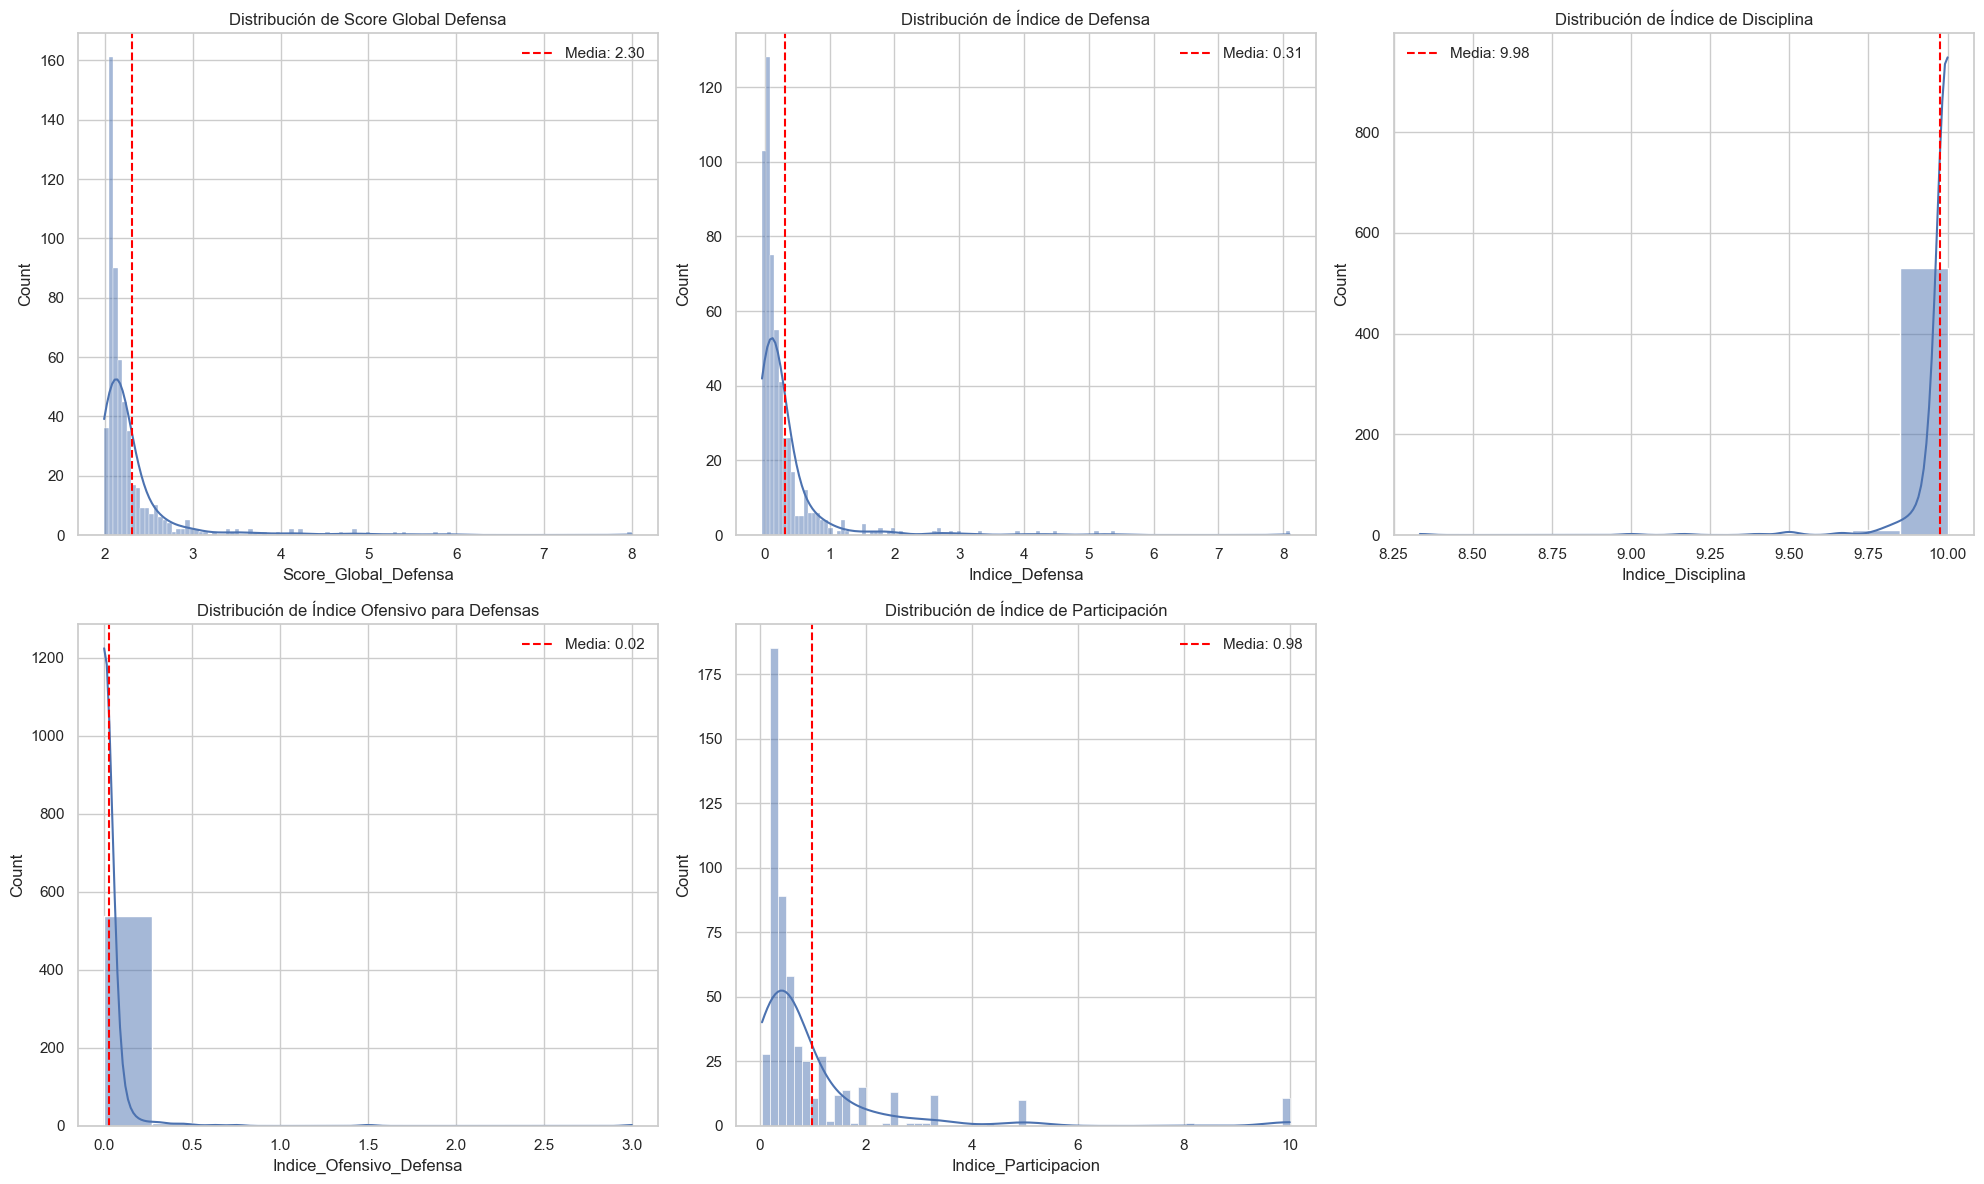

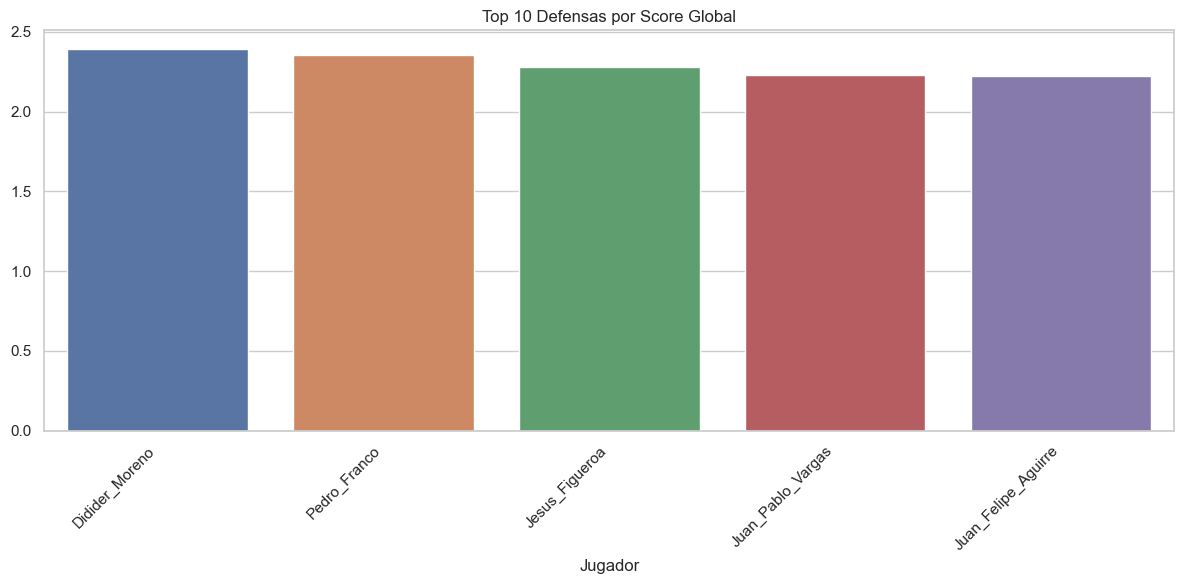

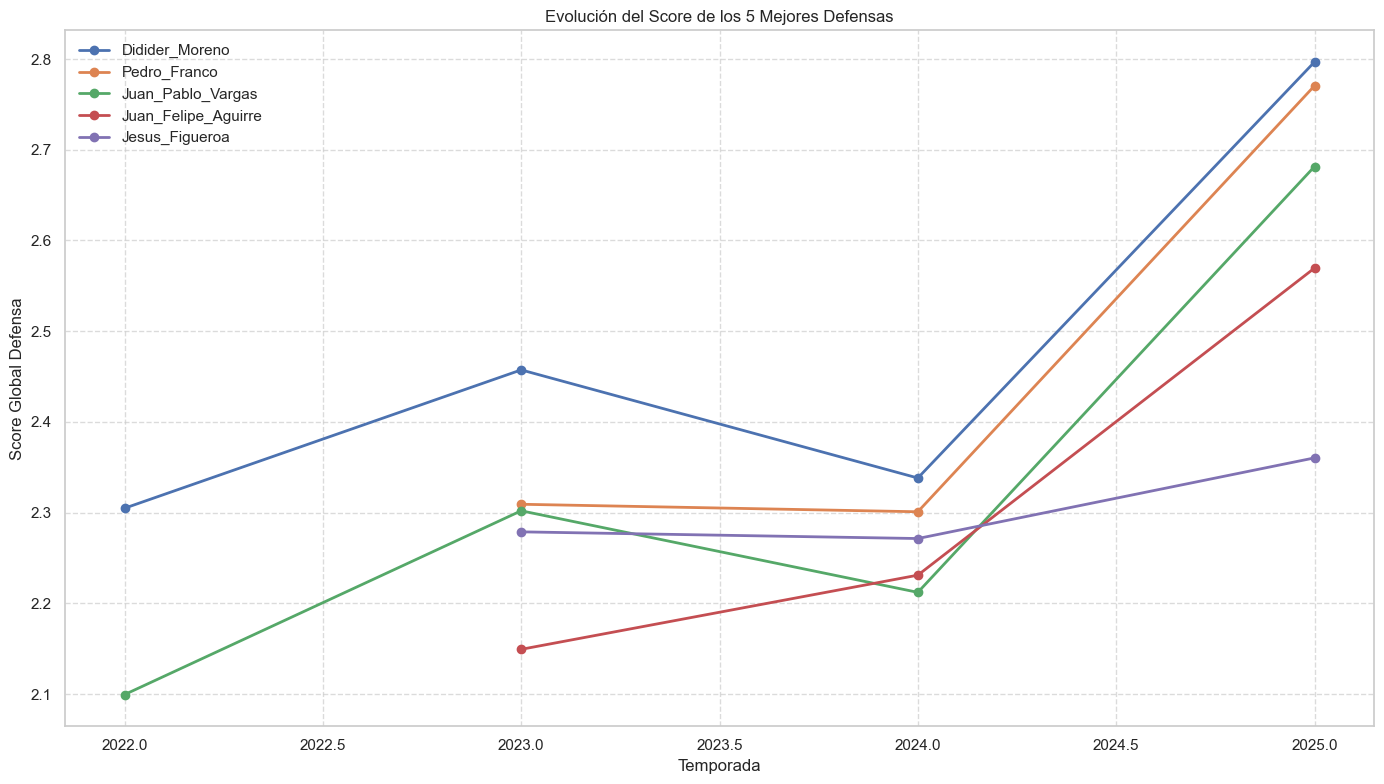

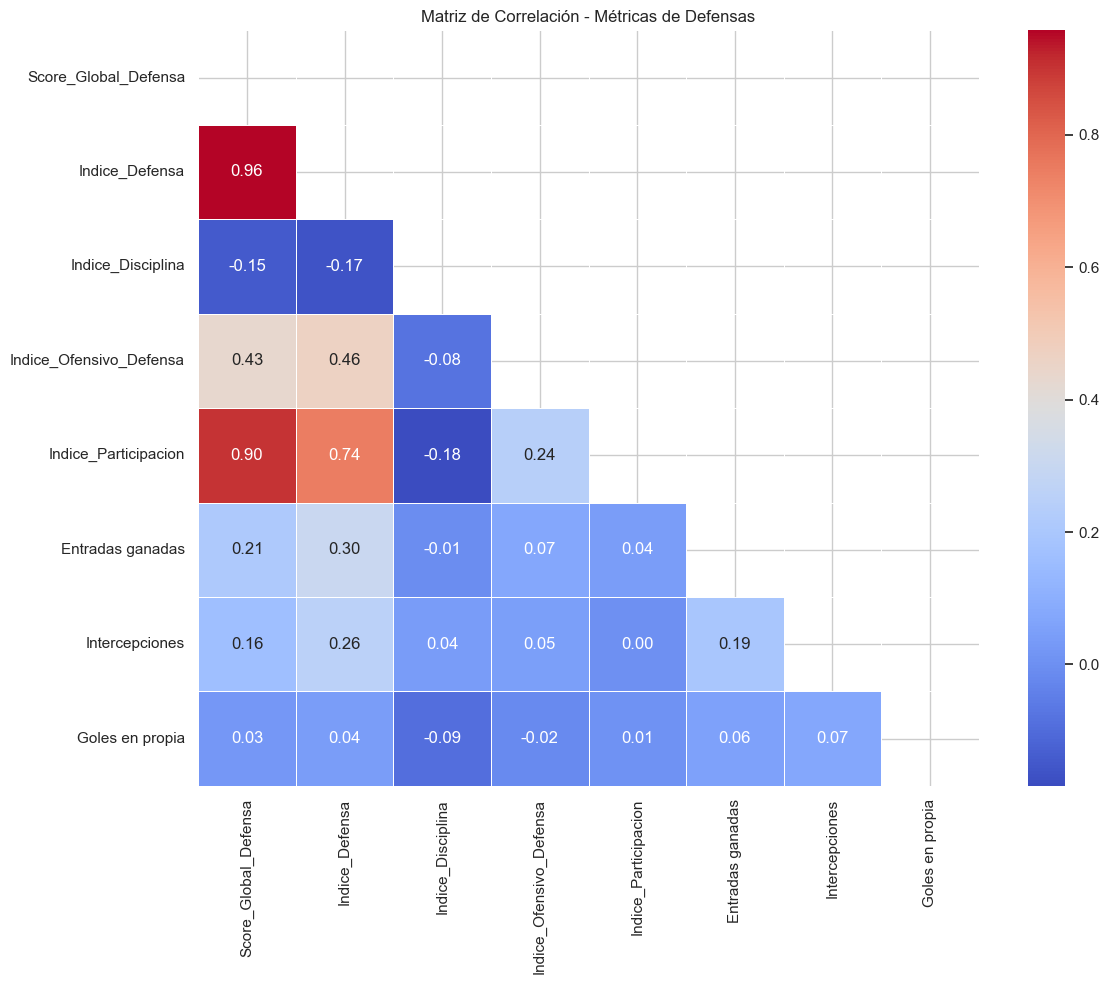

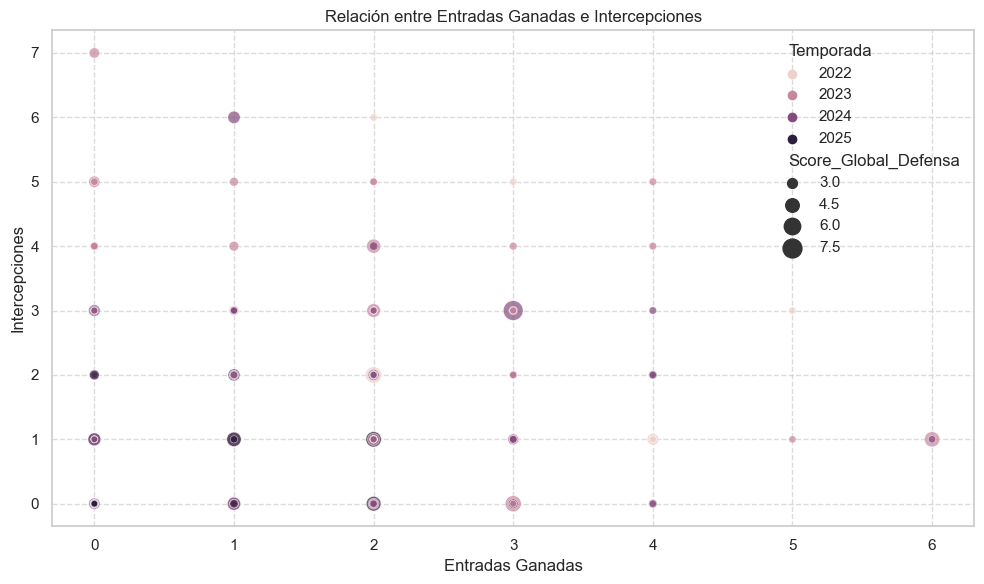

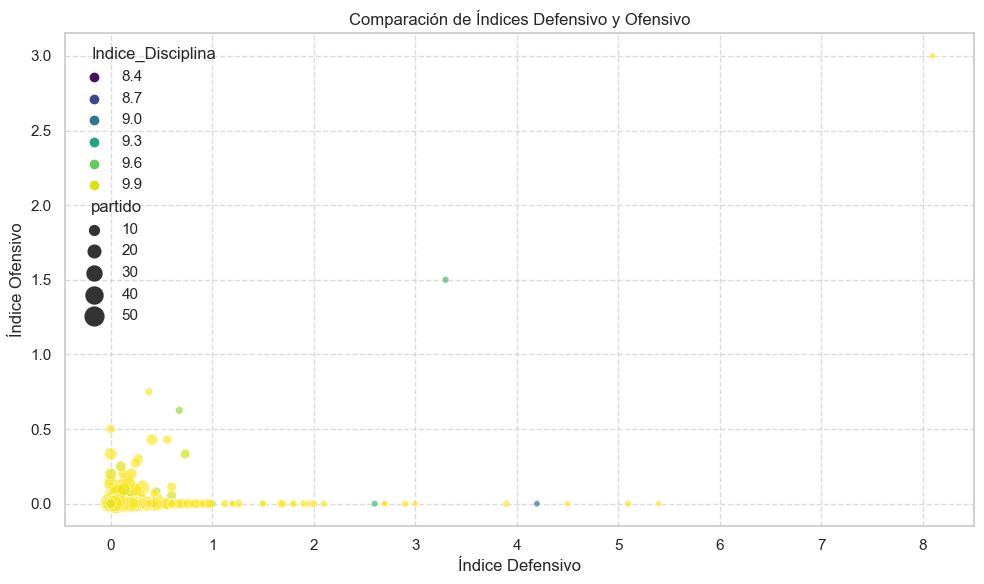


Top 5 Defensas por Score Global:


,Jugador,Score_Global_Defensa,Indice_Defensa,Indice_Disciplina,Indice_Ofensivo_Defensa,Indice_Participacion
0,Didider_Moreno,2.39,0.49,9.97,0.04,0.97
4,Pedro_Franco,2.36,0.34,9.97,0.03,1.28
1,Jesus_Figueroa,2.28,0.26,9.99,0.01,1.02
3,Juan_Pablo_Vargas,2.23,0.22,9.98,0.02,0.81
2,Juan_Felipe_Aguirre,2.23,0.17,9.98,0.02,0.94



Top 5 Defensas por Índice Defensivo:


,Jugador,Score_Global_Defensa,Indice_Defensa,Indice_Disciplina,Indice_Ofensivo_Defensa,Indice_Participacion
0,Didider_Moreno,2.39,0.49,9.97,0.04,0.97
4,Pedro_Franco,2.36,0.34,9.97,0.03,1.28
1,Jesus_Figueroa,2.28,0.26,9.99,0.01,1.02
3,Juan_Pablo_Vargas,2.23,0.22,9.98,0.02,0.81
2,Juan_Felipe_Aguirre,2.23,0.17,9.98,0.02,0.94



Top 5 Defensas por Índice Ofensivo:


,Jugador,Score_Global_Defensa,Indice_Defensa,Indice_Disciplina,Indice_Ofensivo_Defensa,Indice_Participacion
0,Didider_Moreno,2.39,0.49,9.97,0.04,0.97
4,Pedro_Franco,2.36,0.34,9.97,0.03,1.28
2,Juan_Felipe_Aguirre,2.23,0.17,9.98,0.02,0.94
3,Juan_Pablo_Vargas,2.23,0.22,9.98,0.02,0.81
1,Jesus_Figueroa,2.28,0.26,9.99,0.01,1.02



Top 5 Defensas por Índice de Disciplina:


,Jugador,Score_Global_Defensa,Indice_Defensa,Indice_Disciplina,Indice_Ofensivo_Defensa,Indice_Participacion
1,Jesus_Figueroa,2.28,0.26,9.99,0.01,1.02
3,Juan_Pablo_Vargas,2.23,0.22,9.98,0.02,0.81
2,Juan_Felipe_Aguirre,2.23,0.17,9.98,0.02,0.94
0,Didider_Moreno,2.39,0.49,9.97,0.04,0.97
4,Pedro_Franco,2.36,0.34,9.97,0.03,1.28


In [14]:
# Cargar los datos procesados de defensas
df_defensas = pd.read_csv("Defensas_Procesados.csv")

print(f"Análisis de Defensas - {df_defensas.shape[0]} registros")

# 1. Distribución de métricas clave
plt.figure(figsize=(20, 12))

# Distribución de Score Global Defensa
plt.subplot(2, 3, 1)
sns.histplot(df_defensas['Score_Global_Defensa'], kde=True)
plt.title('Distribución de Score Global Defensa')
plt.axvline(df_defensas['Score_Global_Defensa'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Score_Global_Defensa"].mean():.2f}')
plt.legend()

# Distribución de Índice de Defensa
plt.subplot(2, 3, 2)
sns.histplot(df_defensas['Indice_Defensa'], kde=True)
plt.title('Distribución de Índice de Defensa')
plt.axvline(df_defensas['Indice_Defensa'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Indice_Defensa"].mean():.2f}')
plt.legend()

# Distribución de Índice de Disciplina
plt.subplot(2, 3, 3)
sns.histplot(df_defensas['Indice_Disciplina'], kde=True)
plt.title('Distribución de Índice de Disciplina')
plt.axvline(df_defensas['Indice_Disciplina'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Indice_Disciplina"].mean():.2f}')
plt.legend()

# Distribución de Índice Ofensivo para Defensas
plt.subplot(2, 3, 4)
sns.histplot(df_defensas['Indice_Ofensivo_Defensa'], kde=True)
plt.title('Distribución de Índice Ofensivo para Defensas')
plt.axvline(df_defensas['Indice_Ofensivo_Defensa'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Indice_Ofensivo_Defensa"].mean():.2f}')
plt.legend()

# Distribución de Índice de Participación
plt.subplot(2, 3, 5)
sns.histplot(df_defensas['Indice_Participacion'], kde=True)
plt.title('Distribución de Índice de Participación')
plt.axvline(df_defensas['Indice_Participacion'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Indice_Participacion"].mean():.2f}')
plt.legend()

plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/distribucion_metricas_defensas.png')
plt.show()

# 2. Top 10 defensas por Score_Global_Defensa
top_defensas = df_defensas.groupby('Jugador')['Score_Global_Defensa'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_defensas.index, y=top_defensas.values)
plt.title('Top 10 Defensas por Score Global')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/top10_defensas.png')
plt.show()

# 3. Análisis por temporada
defensas_por_temporada = df_defensas.groupby(['Jugador', 'Temporada']).agg({
    'Score_Global_Defensa': 'mean',
    'Indice_Defensa': 'mean',
    'Indice_Disciplina': 'mean',
    'Indice_Ofensivo_Defensa': 'mean',
    'partido': 'count'
}).reset_index()

# Filtrar defensas con al menos 10 partidos
defensas_destacados = defensas_por_temporada[defensas_por_temporada['partido'] >= 10]

# 4. Evolución de los mejores 5 defensas a lo largo de las temporadas
mejores_defensas = defensas_por_temporada.groupby('Jugador')['Score_Global_Defensa'].mean().sort_values(ascending=False).head(5).index.tolist()

plt.figure(figsize=(14, 8))
for defensa in mejores_defensas:
    datos = defensas_por_temporada[defensas_por_temporada['Jugador'] == defensa]
    plt.plot(datos['Temporada'], datos['Score_Global_Defensa'], marker='o', linewidth=2, label=defensa)

plt.title('Evolución del Score de los 5 Mejores Defensas')
plt.xlabel('Temporada')
plt.ylabel('Score Global Defensa')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/evolucion_mejores_defensas.png')
plt.show()

# 5. Análisis de correlación
plt.figure(figsize=(12, 10))
cols_corr = ['Score_Global_Defensa', 'Indice_Defensa', 'Indice_Disciplina', 'Indice_Ofensivo_Defensa',
             'Indice_Participacion', 'Entradas ganadas', 'Intercepciones', 'Goles en propia']
corr = df_defensas[cols_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Métricas de Defensas')
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/correlacion_defensas.png')
plt.show()

# 6. Relación entre entradas ganadas e intercepciones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_defensas, x='Entradas ganadas', y='Intercepciones', 
                hue='Temporada', size='Score_Global_Defensa', sizes=(20, 200), alpha=0.7)
plt.title('Relación entre Entradas Ganadas e Intercepciones')
plt.xlabel('Entradas Ganadas')
plt.ylabel('Intercepciones')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/relacion_entradas_intercepciones.png')
plt.show()

# 7. Comparación de métricas defensivas y ofensivas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_defensas, x='Indice_Defensa', y='Indice_Ofensivo_Defensa', 
                hue='Indice_Disciplina', size='partido', sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Comparación de Índices Defensivo y Ofensivo')
plt.xlabel('Índice Defensivo')
plt.ylabel('Índice Ofensivo')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/comparacion_indices_defensa.png')
plt.show()

# 8. Top 5 defensas por métricas principales
top_metrics = ['Jugador', 'Score_Global_Defensa', 'Indice_Defensa', 
               'Indice_Disciplina', 'Indice_Ofensivo_Defensa', 'Indice_Participacion']

top_defensas_df = df_defensas.groupby('Jugador').agg({
    'Score_Global_Defensa': 'mean',
    'Indice_Defensa': 'mean',
    'Indice_Disciplina': 'mean',
    'Indice_Ofensivo_Defensa': 'mean',
    'Indice_Participacion': 'mean',
    'partido': 'count'
}).reset_index()

# Filtrar defensas con al menos 10 partidos
top_defensas_df = top_defensas_df[top_defensas_df['partido'] >= 10]

print("\nTop 5 Defensas por Score Global:")
display(top_defensas_df.sort_values('Score_Global_Defensa', ascending=False)[top_metrics].head(5))

print("\nTop 5 Defensas por Índice Defensivo:")
display(top_defensas_df.sort_values('Indice_Defensa', ascending=False)[top_metrics].head(5))

print("\nTop 5 Defensas por Índice Ofensivo:")
display(top_defensas_df.sort_values('Indice_Ofensivo_Defensa', ascending=False)[top_metrics].head(5))

print("\nTop 5 Defensas por Índice de Disciplina:")
display(top_defensas_df.sort_values('Indice_Disciplina', ascending=False)[top_metrics].head(5))

7. Análisis Exploratorio (Goleadores)

Análisis de Goleadores - 662 registros


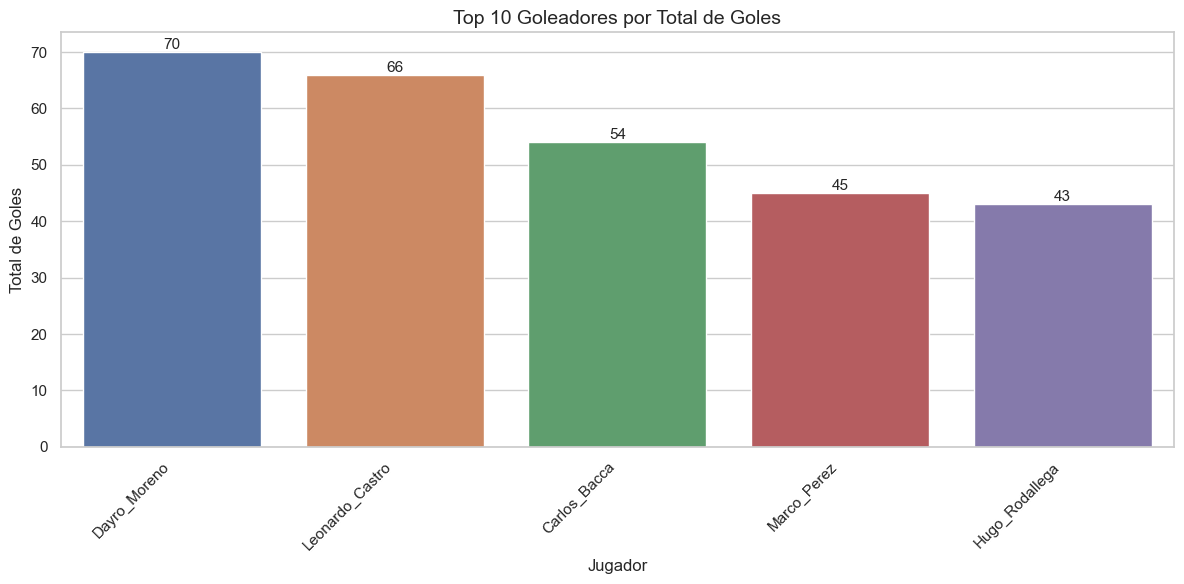

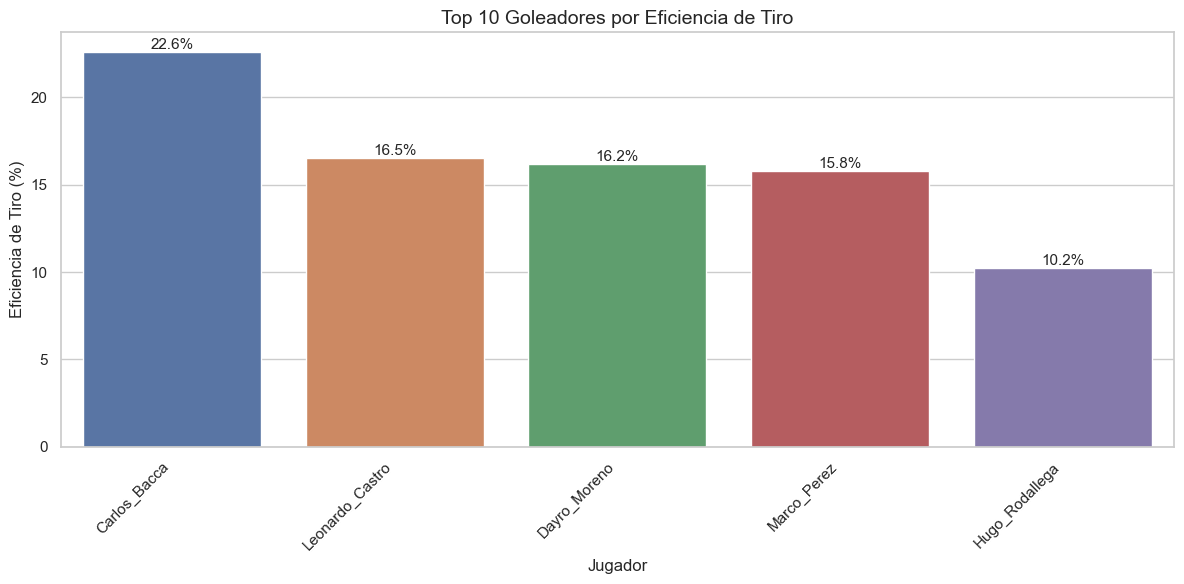

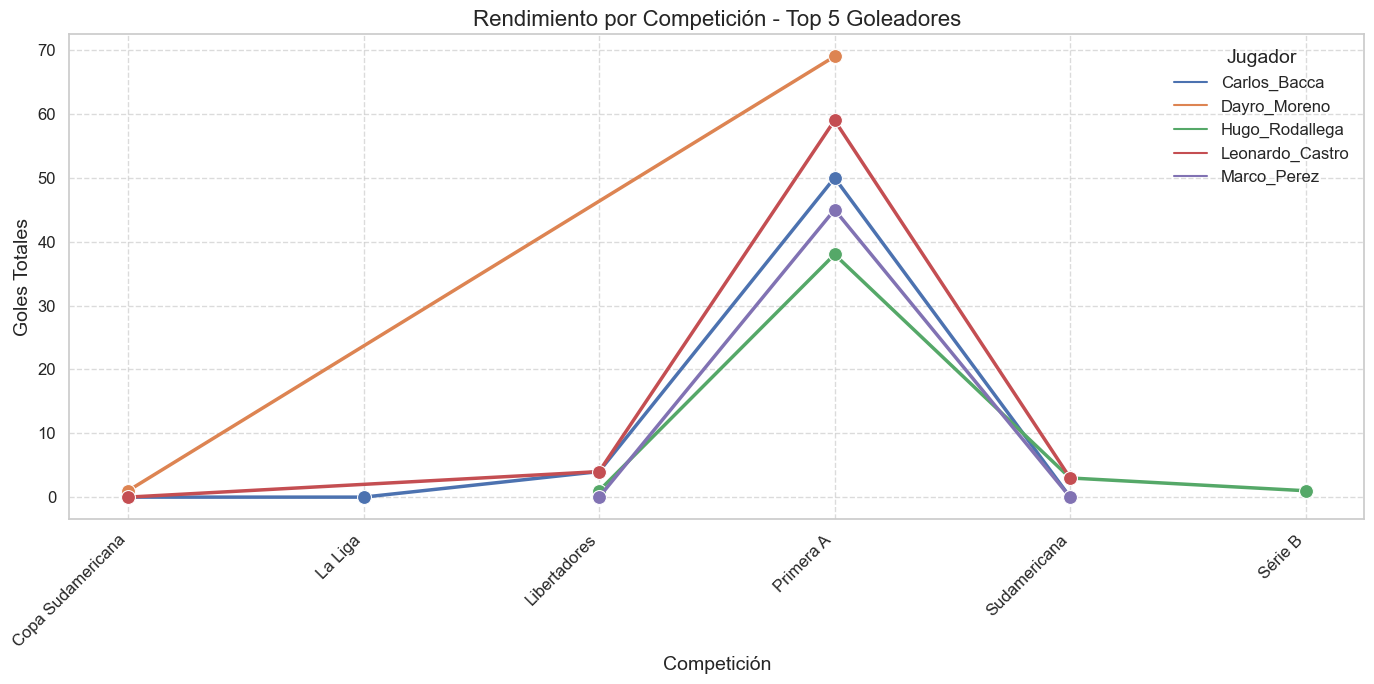

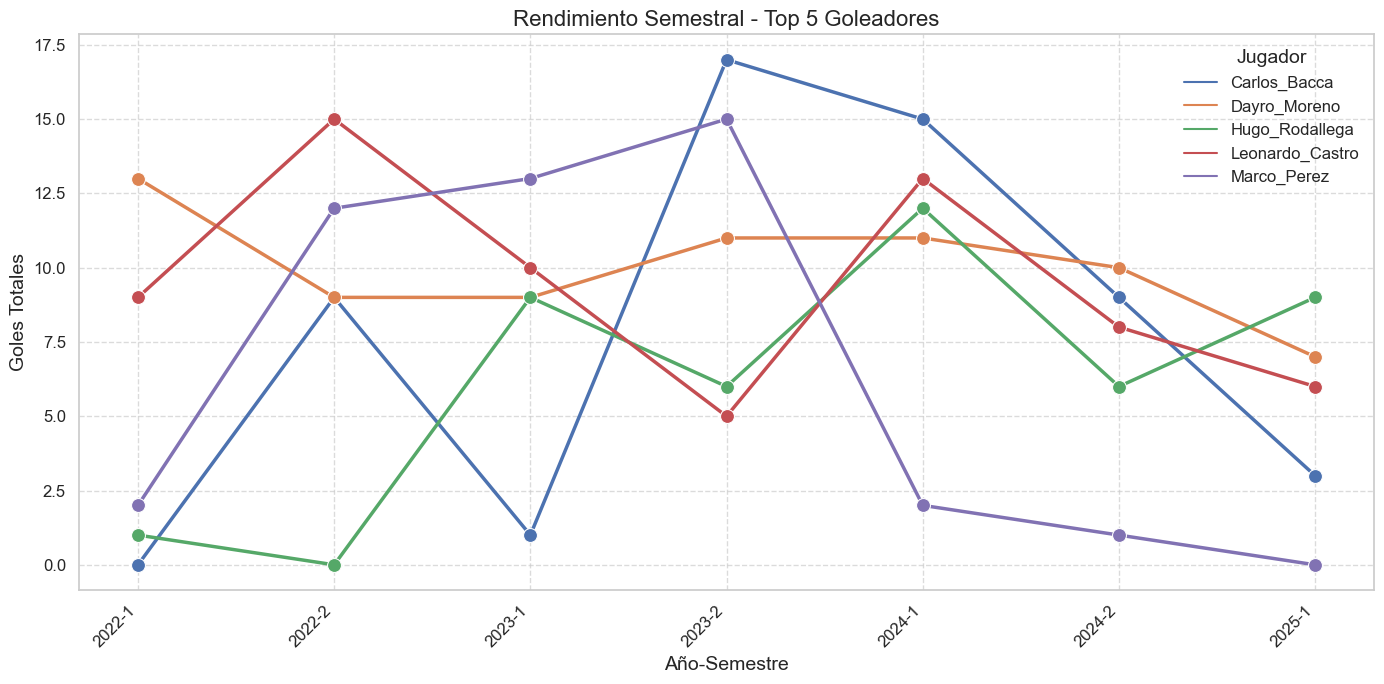

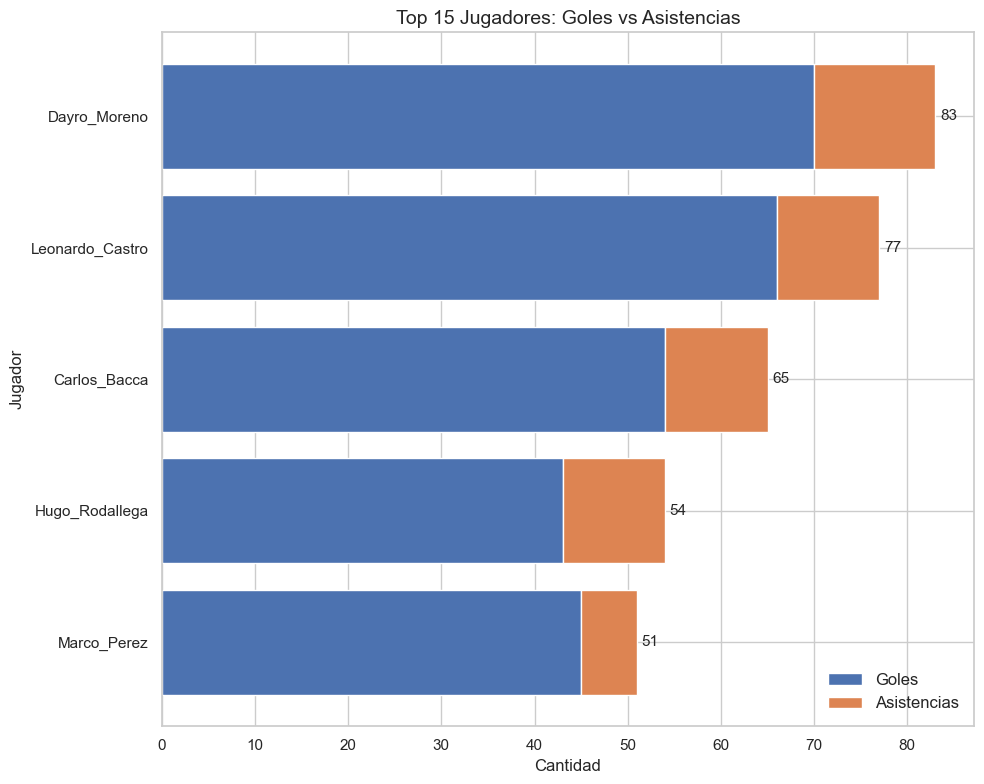

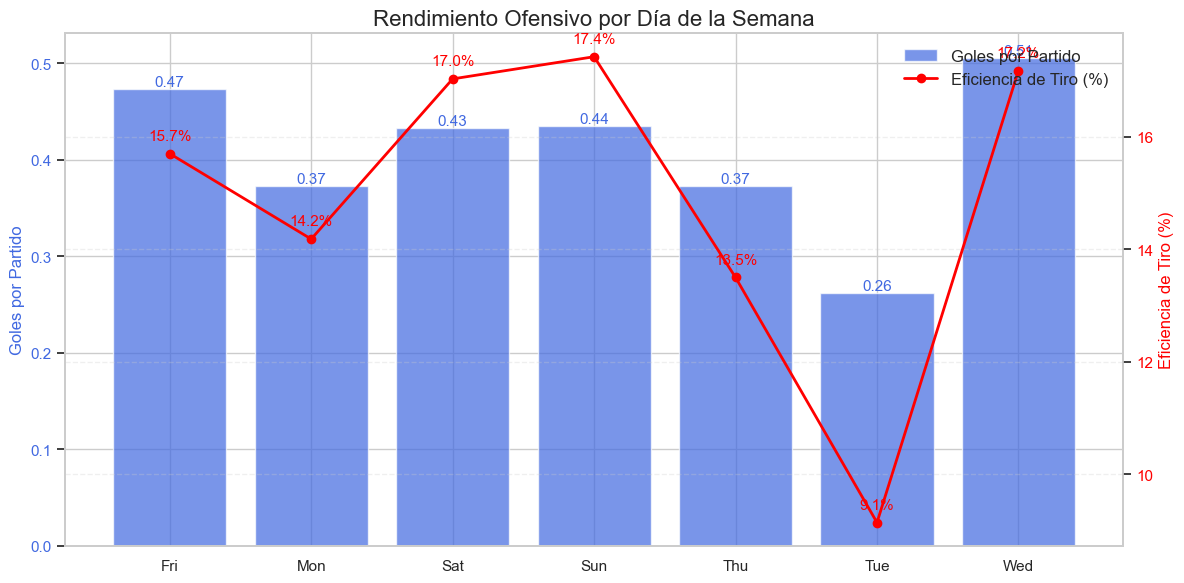

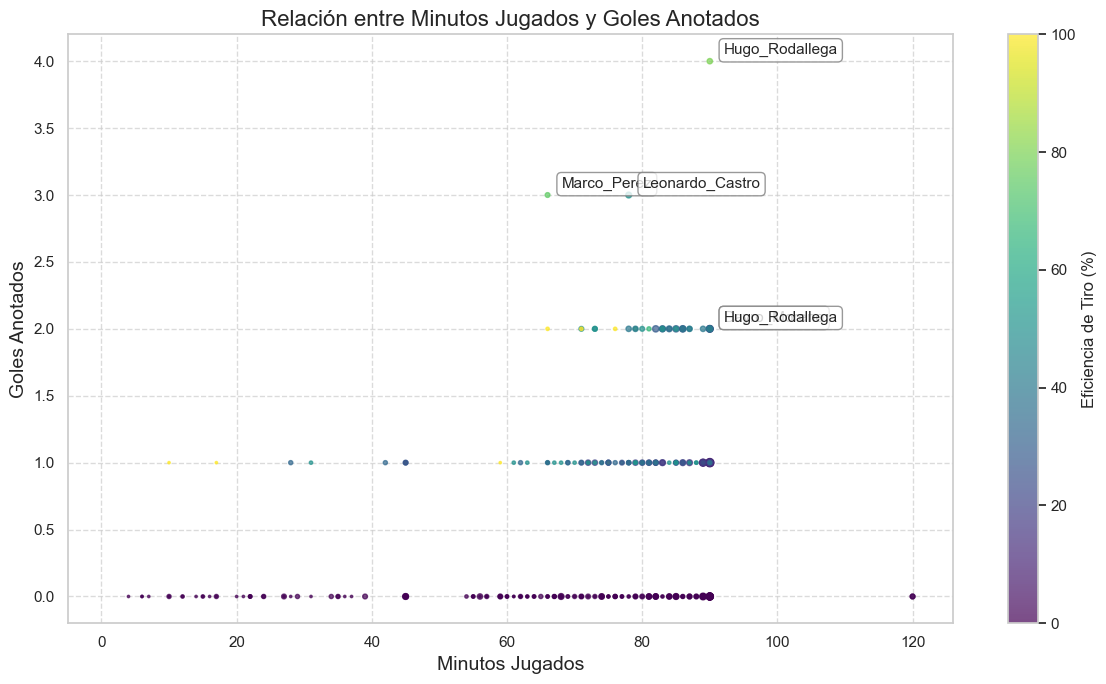


Top 5 Goleadores por Total de Goles:


,Jugador,Score_Global_Ataque,Goles_por_Partido,Goles_por_90min,Eficiencia_Tiro,Indice_Ofensivo,Goles
1,Dayro_Moreno,1.43,0.06,0.50,15.52,0.20,70
3,Leonardo_Castro,1.46,0.08,0.54,15.51,0.28,66
0,Carlos_Bacca,1.31,0.04,0.48,17.36,0.15,54
4,Marco_Perez,1.29,0.03,0.52,12.05,0.13,45
2,Hugo_Rodallega,1.39,0.04,0.39,10.90,0.16,43



Top 5 Goleadores por Score Global de Ataque:


,Jugador,Score_Global_Ataque,Goles_por_Partido,Goles_por_90min,Eficiencia_Tiro,Indice_Ofensivo,Goles
3,Leonardo_Castro,1.46,0.08,0.54,15.51,0.28,66
1,Dayro_Moreno,1.43,0.06,0.50,15.52,0.20,70
2,Hugo_Rodallega,1.39,0.04,0.39,10.90,0.16,43
0,Carlos_Bacca,1.31,0.04,0.48,17.36,0.15,54
4,Marco_Perez,1.29,0.03,0.52,12.05,0.13,45



Top 5 Goleadores por Goles por 90 minutos:


,Jugador,Score_Global_Ataque,Goles_por_Partido,Goles_por_90min,Eficiencia_Tiro,Indice_Ofensivo,Goles
3,Leonardo_Castro,1.46,0.08,0.54,15.51,0.28,66
4,Marco_Perez,1.29,0.03,0.52,12.05,0.13,45
1,Dayro_Moreno,1.43,0.06,0.50,15.52,0.20,70
0,Carlos_Bacca,1.31,0.04,0.48,17.36,0.15,54
2,Hugo_Rodallega,1.39,0.04,0.39,10.90,0.16,43



Top 5 Goleadores por Eficiencia de Tiro:


,Jugador,Score_Global_Ataque,Goles_por_Partido,Goles_por_90min,Eficiencia_Tiro,Indice_Ofensivo,Goles
0,Carlos_Bacca,1.31,0.04,0.48,17.36,0.15,54
1,Dayro_Moreno,1.43,0.06,0.50,15.52,0.20,70
3,Leonardo_Castro,1.46,0.08,0.54,15.51,0.28,66
4,Marco_Perez,1.29,0.03,0.52,12.05,0.13,45
2,Hugo_Rodallega,1.39,0.04,0.39,10.90,0.16,43


In [9]:
# Cargar los datos procesados de goleadores
df_goleadores = pd.read_csv("Goleadores_Procesados.csv")

# Asegurarse de que la carpeta para imágenes existe
import os
carpeta_imagenes = "data/imagenes"
carpeta_goleadores = f"{carpeta_imagenes}/analisis_goleadores"

# Crear la carpeta si no existe
os.makedirs(carpeta_goleadores, exist_ok=True)

print(f"Análisis de Goleadores - {df_goleadores.shape[0]} registros")

# Convertir la columna de fecha a formato datetime
df_goleadores['Fecha'] = pd.to_datetime(df_goleadores['Fecha'], errors='coerce')

# 1. Top 10 goleadores por total de goles
top_goleadores_total = df_goleadores.groupby('Jugador').agg({
    'Goles': 'sum',
    'partido': 'count'
}).reset_index()

# Filtrar jugadores con al menos 10 partidos
top_goleadores_total = top_goleadores_total[top_goleadores_total['partido'] >= 10]
top_goleadores_total = top_goleadores_total.sort_values('Goles', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Jugador', y='Goles', data=top_goleadores_total)
plt.title('Top 10 Goleadores por Total de Goles', fontsize=14)
plt.xlabel('Jugador', fontsize=12)
plt.ylabel('Total de Goles', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas con el número de goles encima de cada barra
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize=11)

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/top10_goleadores_total.png')
plt.show()

# 2. Top 10 goleadores por eficiencia (goles por tiros)
top_goleadores_eficiencia = df_goleadores.groupby('Jugador').agg({
    'Goles': 'sum',
    'Tiros totales': 'sum',
    'partido': 'count'
}).reset_index()

# Filtrar jugadores con al menos 10 partidos y 20 tiros totales
top_goleadores_eficiencia = top_goleadores_eficiencia[
    (top_goleadores_eficiencia['partido'] >= 10) & 
    (top_goleadores_eficiencia['Tiros totales'] >= 20)
]

# Calcular eficiencia
top_goleadores_eficiencia['Eficiencia (%)'] = (top_goleadores_eficiencia['Goles'] / 
                                              top_goleadores_eficiencia['Tiros totales']) * 100
top_goleadores_eficiencia = top_goleadores_eficiencia.sort_values('Eficiencia (%)', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Jugador', y='Eficiencia (%)', data=top_goleadores_eficiencia)
plt.title('Top 10 Goleadores por Eficiencia de Tiro', fontsize=14)
plt.xlabel('Jugador', fontsize=12)
plt.ylabel('Eficiencia de Tiro (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas con el porcentaje de eficiencia encima de cada barra
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize=11)

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/top10_goleadores_eficiencia.png')
plt.show()

# 3. Rendimiento por torneo (competición) para los 5 mejores goleadores
mejores_goleadores = top_goleadores_total.head(5)['Jugador'].tolist()

# Obtener datos por torneo
goles_por_torneo = df_goleadores[df_goleadores['Jugador'].isin(mejores_goleadores)].groupby(['Jugador', 'Competición']).agg({
    'Goles': 'sum',
    'partido': 'count'
}).reset_index()

# Crear un gráfico de línea más claro
plt.figure(figsize=(14, 7))
sns.lineplot(x='Competición', y='Goles', hue='Jugador', data=goles_por_torneo, 
             marker='o', linewidth=2.5, markersize=10)

plt.title('Rendimiento por Competición - Top 5 Goleadores', fontsize=16)
plt.xlabel('Competición', fontsize=14)
plt.ylabel('Goles Totales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Jugador', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/rendimiento_competicion_top5.png')
plt.show()

# 4. Rendimiento por año y semestre
# Extraer año y semestre de la fecha
df_goleadores['Año'] = df_goleadores['Fecha'].dt.year
df_goleadores['Semestre'] = ((df_goleadores['Fecha'].dt.month > 6).astype(int) + 1)
df_goleadores['Año-Semestre'] = df_goleadores['Año'].astype(str) + '-' + df_goleadores['Semestre'].astype(str)

# Análisis por semestre para los mejores goleadores
goles_por_semestre = df_goleadores[df_goleadores['Jugador'].isin(mejores_goleadores)].groupby(['Jugador', 'Año-Semestre']).agg({
    'Goles': 'sum',
    'partido': 'count'
}).reset_index()

# Ordenar cronológicamente
goles_por_semestre['Año'] = goles_por_semestre['Año-Semestre'].str.split('-').str[0].astype(int)
goles_por_semestre['Semestre'] = goles_por_semestre['Año-Semestre'].str.split('-').str[1].astype(int)
goles_por_semestre = goles_por_semestre.sort_values(['Año', 'Semestre'])

plt.figure(figsize=(14, 7))
sns.lineplot(x='Año-Semestre', y='Goles', hue='Jugador', data=goles_por_semestre, 
             marker='o', linewidth=2.5, markersize=10)

plt.title('Rendimiento Semestral - Top 5 Goleadores', fontsize=16)
plt.xlabel('Año-Semestre', fontsize=14)
plt.ylabel('Goles Totales', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Jugador', fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/rendimiento_semestral_top5.png')
plt.show()

# 5. Comparación de Goles vs Asistencias (Top 15 jugadores)
top_contribucion = df_goleadores.groupby('Jugador').agg({
    'Goles': 'sum',
    'Asistencias': 'sum',
    'partido': 'count'
}).reset_index()

# Filtrar jugadores con al menos 10 partidos
top_contribucion = top_contribucion[top_contribucion['partido'] >= 10]

# Calcular contribución total
top_contribucion['Contribución Total'] = top_contribucion['Goles'] + top_contribucion['Asistencias']
top_contribucion = top_contribucion.sort_values('Contribución Total', ascending=False).head(15)

# Preparar datos para gráfico apilado
top_contribucion = top_contribucion.sort_values('Contribución Total', ascending=True)  # Invertir para mejor visualización

plt.figure(figsize=(10, 8))
bars = plt.barh(top_contribucion['Jugador'], top_contribucion['Goles'], label='Goles')
bars = plt.barh(top_contribucion['Jugador'], top_contribucion['Asistencias'], 
               left=top_contribucion['Goles'], label='Asistencias')

plt.title('Top 15 Jugadores: Goles vs Asistencias', fontsize=14)
plt.xlabel('Cantidad', fontsize=12)
plt.ylabel('Jugador', fontsize=12)
plt.legend(fontsize=12)

# Añadir etiquetas con los valores totales
for i, (goles, asist) in enumerate(zip(top_contribucion['Goles'], top_contribucion['Asistencias'])):
    total = goles + asist
    plt.text(total + 0.5, i, f'{total:.0f}', va='center', fontsize=11)

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/goles_vs_asistencias.png')
plt.show()

# 7. Eficiencia por día de la semana
dias_de_semana = df_goleadores.groupby('Día de la semana').agg({
    'Goles': 'sum',
    'Tiros totales': 'sum',
    'partido': 'count'
}).reset_index()

dias_de_semana['Goles por Partido'] = dias_de_semana['Goles'] / dias_de_semana['partido']
dias_de_semana['Eficiencia de Tiro (%)'] = (dias_de_semana['Goles'] / dias_de_semana['Tiros totales']) * 100

# Orden personalizado de días de la semana
orden_dias = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
# Filtrar solo días presentes en los datos
orden_dias_filtrado = [dia for dia in orden_dias if dia in dias_de_semana['Día de la semana'].values]

# Aplicar orden solo si hay días en la lista filtrada
if orden_dias_filtrado:
    dias_de_semana['Día_orden'] = pd.Categorical(dias_de_semana['Día de la semana'], 
                                                categories=orden_dias_filtrado, 
                                                ordered=True)
    dias_de_semana = dias_de_semana.sort_values('Día_orden')

plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()

# Gráfico de barras para Goles por Partido
bars = ax1.bar(dias_de_semana['Día de la semana'], dias_de_semana['Goles por Partido'], 
              color='royalblue', alpha=0.7, label='Goles por Partido')
ax1.set_ylabel('Goles por Partido', color='royalblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='royalblue')

# Gráfico de línea para Eficiencia de Tiro
line = ax2.plot(dias_de_semana['Día de la semana'], dias_de_semana['Eficiencia de Tiro (%)'], 
               color='red', marker='o', linewidth=2, label='Eficiencia de Tiro (%)')
ax2.set_ylabel('Eficiencia de Tiro (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Añadir etiquetas a las barras
for i, p in enumerate(bars):
    ax1.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize=11, color='royalblue')

# Añadir etiquetas a la línea
for i, (dia, eficiencia) in enumerate(zip(dias_de_semana['Día de la semana'], dias_de_semana['Eficiencia de Tiro (%)'])):
    ax2.annotate(f'{eficiencia:.1f}%', 
                (i, eficiencia), 
                xytext=(0, 10), 
                textcoords='offset points',
                ha='center', fontsize=11, color='red')

plt.title('Rendimiento Ofensivo por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.3)

# Añadir ambas leyendas
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=12)

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/rendimiento_por_dia.png')
plt.show()

# 8. Relación entre minutos jugados y goles anotados
plt.figure(figsize=(12, 7))
scatter = plt.scatter(df_goleadores['Minutos'], df_goleadores['Goles'], 
                     c=df_goleadores['Eficiencia_Tiro'], cmap='viridis', 
                     s=df_goleadores['Tiros totales']*3, alpha=0.7)

plt.title('Relación entre Minutos Jugados y Goles Anotados', fontsize=16)
plt.xlabel('Minutos Jugados', fontsize=14)
plt.ylabel('Goles Anotados', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir colorbar para eficiencia
cbar = plt.colorbar(scatter)
cbar.set_label('Eficiencia de Tiro (%)', fontsize=12)

# Anotar jugadores destacados (top 5 por goles)
destacados = df_goleadores.sort_values('Goles', ascending=False).head(5)
for i, row in destacados.iterrows():
    plt.annotate(row['Jugador'], 
                (row['Minutos'], row['Goles']),
                xytext=(10, 5),
                textcoords='offset points',
                fontsize=11,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/minutos_vs_goles.png')
plt.show()

# 9. Top 5 goleadores por métricas principales
top_metrics = ['Jugador', 'Score_Global_Ataque', 'Goles_por_Partido', 
               'Goles_por_90min', 'Eficiencia_Tiro', 'Indice_Ofensivo', 'Goles']

top_goleadores_df = df_goleadores.groupby('Jugador').agg({
    'Score_Global_Ataque': 'mean',
    'Goles_por_Partido': 'mean',
    'Goles_por_90min': 'mean',
    'Eficiencia_Tiro': 'mean',
    'Indice_Ofensivo': 'mean',
    'partido': 'count',
    'Goles': 'sum'
}).reset_index()

# Filtrar goleadores con al menos 10 partidos
top_goleadores_df = top_goleadores_df[top_goleadores_df['partido'] >= 10]

print("\nTop 5 Goleadores por Total de Goles:")
display(top_goleadores_df.sort_values('Goles', ascending=False)[top_metrics].head(5))

print("\nTop 5 Goleadores por Score Global de Ataque:")
display(top_goleadores_df.sort_values('Score_Global_Ataque', ascending=False)[top_metrics].head(5))

print("\nTop 5 Goleadores por Goles por 90 minutos:")
display(top_goleadores_df.sort_values('Goles_por_90min', ascending=False)[top_metrics].head(5))

print("\nTop 5 Goleadores por Eficiencia de Tiro:")
display(top_goleadores_df.sort_values('Eficiencia_Tiro', ascending=False)[top_metrics].head(5))

Preparación de Datos para Modelo ARIMAX en Series Temporales de Fútbol (Goleadores)


In [21]:
# 1. Cargar los datos de goleadores
print("Cargando datos de goleadores...")
goleadores = pd.read_csv('Goleadores_Procesados.csv')

# Convertir Fecha a datetime
goleadores['Fecha'] = pd.to_datetime(goleadores['Fecha'])

# Ordenar por Jugador y Fecha
goleadores = goleadores.sort_values(['Jugador', 'Fecha'])

# 2. Identificar los jugadores únicos
jugadores_unicos = goleadores['Jugador'].unique()
print(f"\nTotal de jugadores en el dataset: {len(jugadores_unicos)}")
print(f"Jugadores: {', '.join(jugadores_unicos[:5])}{'...' if len(jugadores_unicos) > 5 else ''}")

# Definir las variables objetivo a predecir
variables_objetivo = ['Indice_Ofensivo', 'Goles']
print(f"\nVariables objetivo a predecir: {', '.join(variables_objetivo)}")

# 3. Variables para el modelo ARIMAX (incluyendo todas las variables objetivo)
variables_modelo = ['Fecha', 'Jugador', 'Indice_Ofensivo', 'Goles', 'Goles_por_Partido', 
                    'Score_Global_Ataque', 'Indice_Participacion']

# 4. Cargar datos complementarios (defensas para Indice_Defensa)
try:
    print("\nCargando datos de defensas para variables exógenas...")
    defensas = pd.read_csv('Defensas_Procesados.csv')
    defensas['Fecha'] = pd.to_datetime(defensas['Fecha'])
    
    # Crear un promedio diario del Indice_Defensa para usar como variable exógena
    defensa_diaria = defensas.groupby('Fecha')['Indice_Defensa'].mean().reset_index()
    
    # Añadir Indice_Defensa a los datos de goleadores
    goleadores = pd.merge(
        goleadores, 
        defensa_diaria[['Fecha', 'Indice_Defensa']], 
        on='Fecha', 
        how='left'
    )
    variables_modelo.append('Indice_Defensa')
    print("Indice_Defensa añadido como variable exógena")
except Exception as e:
    print(f"No se pudieron cargar datos de defensas: {e}")

# 5. Función para dividir en conjuntos de entrenamiento y prueba
def dividir_train_test(df, fecha_corte='2025-01-01'):
    fecha_corte = pd.to_datetime(fecha_corte)
    train = df[df['Fecha'] < fecha_corte].copy()
    test = df[df['Fecha'] >= fecha_corte].copy()
    return train, test

# 6. Función para evaluar estacionariedad
def test_estacionariedad(serie, nombre):
    if len(serie) < 10:
        print(f"Serie {nombre} tiene menos de 10 observaciones. No se puede realizar test ADF.")
        return False
        
    resultado = adfuller(serie.dropna())
    print(f'Resultados del Test ADF para {nombre}:')
    print(f'Estadístico ADF: {resultado[0]:.4f}')
    print(f'Valor p: {resultado[1]:.4f}')
    
    if resultado[1] <= 0.05:
        print(f"Conclusión: Serie {nombre} es estacionaria (rechazamos H0)")
        return True
    else:
        print(f"Conclusión: Serie {nombre} NO es estacionaria (no rechazamos H0)")
        return False

# 7. Selección de jugadores específicos para análisis
# Puedes especificar manualmente o tomar los primeros 5
goleadores_a_analizar = jugadores_unicos[:5]  # Tomar los primeros 5
print(f"\nJugadores seleccionados para análisis individual: {', '.join(goleadores_a_analizar)}")

# 8. Preparar datos para cada jugador
datos_por_jugador = {}
fecha_corte = '2025-01-01'  # Fecha para división train/test

for jugador in goleadores_a_analizar:
    print(f"\nPreparando datos para: {jugador}")
    
    # Filtrar datos del jugador
    datos_jugador = goleadores[goleadores['Jugador'] == jugador][variables_modelo].copy()
    
    print(f"  Registros encontrados: {len(datos_jugador)}")
    
    # Verificar si las variables objetivo existen
    for variable in variables_objetivo:
        if variable not in datos_jugador.columns:
            print(f"  ⚠️ Variable {variable} no encontrada para {jugador}")
    
    # Dividir en entrenamiento y prueba
    train, test = dividir_train_test(datos_jugador, fecha_corte)
    print(f"  Registros en entrenamiento: {len(train)}")
    print(f"  Registros en prueba: {len(test)}")
    
    # Almacenar en diccionario
    datos_por_jugador[jugador] = {
        'completo': datos_jugador,
        'train': train,
        'test': test
    }
    
    # Verificar si hay suficientes datos
    if len(train) < 30:
        print(f"  ⚠️ Advertencia: Pocos datos de entrenamiento para {jugador}")
    
    if len(test) == 0:
        print(f"  ⚠️ Advertencia: No hay datos de prueba para {jugador}")

# 9. Verificar y preparar datos para todas las variables objetivo
print("\nVerificando datos para las variables objetivo:")
for variable in variables_objetivo:
    print(f"\nVariable: {variable}")
    for jugador, datos in datos_por_jugador.items():
        train_ts = datos['train'].set_index('Fecha')
        test_ts = datos['test'].set_index('Fecha')
        
        # Verificar disponibilidad de la variable
        if variable in train_ts.columns:
            # Calcular estadísticas básicas
            promedio = train_ts[variable].mean()
            max_val = train_ts[variable].max()
            min_val = train_ts[variable].min()
            print(f"  {jugador}: {len(train_ts)} registros - Promedio: {promedio:.2f}, Rango: [{min_val:.2f}, {max_val:.2f}]")
            
            # Verificar estacionariedad
            if variable == 'Indice_Ofensivo':  # Solo verificamos estacionariedad para la variable principal
                es_estacionaria = test_estacionariedad(train_ts[variable], f"{variable} de {jugador}")
        else:
            print(f"  {jugador}: Variable {variable} no disponible")

# 10. Preparar variables exógenas
print("\nPreparando variables exógenas para cada jugador:")
for jugador, datos in datos_por_jugador.items():
    train_ts = datos['train'].set_index('Fecha')
    test_ts = datos['test'].set_index('Fecha')
    
    # Definir variables exógenas (excluyendo las variables objetivo, Fecha y Jugador)
    variables_exogenas = [col for col in variables_modelo if col not in ['Fecha', 'Jugador'] + variables_objetivo]
    
    # Comprobar valores nulos en variables exógenas
    nulos_train = train_ts[variables_exogenas].isnull().sum().sum()
    nulos_test = test_ts[variables_exogenas].isnull().sum().sum()
    
    print(f"\n{jugador}:")
    print(f"  Variables exógenas: {', '.join(variables_exogenas)}")
    print(f"  Valores nulos en variables exógenas: {nulos_train} (train), {nulos_test} (test)")
    
    # Imputar valores nulos si es necesario
    if nulos_train > 0 or nulos_test > 0:
        print("  Imputando valores nulos con la media...")
        for col in variables_exogenas:
            if train_ts[col].isnull().any():
                media = train_ts[col].mean()
                train_ts[col] = train_ts[col].fillna(media)
                test_ts[col] = test_ts[col].fillna(media)
        
        # Actualizar datos en el diccionario
        train_actualizado = train_ts.reset_index()
        test_actualizado = test_ts.reset_index()
        
        datos_por_jugador[jugador]['train'] = train_actualizado
        datos_por_jugador[jugador]['test'] = test_actualizado

print("\nPreparación de datos completa para todas las variables objetivo. Listos para el modelado ARIMAX individual.")

Cargando datos de goleadores...

Total de jugadores en el dataset: 5
Jugadores: Carlos_Bacca, Dayro_Moreno, Hugo_Rodallega, Leonardo_Castro, Marco_Perez

Variables objetivo a predecir: Indice_Ofensivo, Goles

Cargando datos de defensas para variables exógenas...
Indice_Defensa añadido como variable exógena

Jugadores seleccionados para análisis individual: Carlos_Bacca, Dayro_Moreno, Hugo_Rodallega, Leonardo_Castro, Marco_Perez

Preparando datos para: Carlos_Bacca
  Registros encontrados: 135
  Registros en entrenamiento: 124
  Registros en prueba: 11

Preparando datos para: Dayro_Moreno
  Registros encontrados: 146
  Registros en entrenamiento: 131
  Registros en prueba: 15

Preparando datos para: Hugo_Rodallega
  Registros encontrados: 122
  Registros en entrenamiento: 107
  Registros en prueba: 15

Preparando datos para: Leonardo_Castro
  Registros encontrados: 138
  Registros en entrenamiento: 127
  Registros en prueba: 11

Preparando datos para: Marco_Perez
  Registros encontrados

**Entrenamiento del modelo ARIMAX para los 5 goleadores**

In [ ]:
# Entrenamiento de modelos ARIMAX individuales para cada jugador con múltiples variables objetivo
print("\nIniciando entrenamiento de modelos ARIMAX individuales con múltiples variables objetivo...")

# Diccionario para almacenar los modelos entrenados
modelos_jugadores = {}

# Iterar sobre cada jugador
for jugador in datos_por_jugador.keys():
    print(f"\n{'='*70}")
    print(f"Análisis para: {jugador}")
    print(f"{'='*70}")
    
    # Inicializar el diccionario para este jugador
    modelos_jugadores[jugador] = {}
    
    # Iterar sobre cada variable objetivo
    for variable in variables_objetivo:
        print(f"\n{'*'*50}")
        print(f"Entrenando modelo para predecir: {variable}")
        print(f"{'*'*50}")
        
        # Obtener datos de entrenamiento y prueba
        train = datos_por_jugador[jugador]['train']
        test = datos_por_jugador[jugador]['test']
        
        # Configurar datos de series temporales
        train_ts = train.set_index('Fecha')
        test_ts = test.set_index('Fecha')
        
        # Verificar si la variable existe en los datos
        if variable not in train_ts.columns:
            print(f"⚠️ La variable {variable} no está disponible para {jugador}. Saltando...")
            continue
        
        # Variables exógenas (todas excepto Fecha, Jugador y las variables objetivo)
        variables_exogenas = [col for col in variables_modelo 
                              if col not in ['Fecha', 'Jugador'] + variables_objetivo]
        
        # Preparar matrices de variables exógenas
        exog_train = train_ts[variables_exogenas]
        exog_test = test_ts[variables_exogenas]
        
        # Determinar parámetros óptimos con auto_arima
        print(f"\nBuscando parámetros óptimos para ARIMA ({variable})...")
        try:
            modelo_auto = pm.auto_arima(
                train_ts[variable],
                exogenous=exog_train,
                start_p=0, max_p=3,
                start_q=0, max_q=3,
                d=None,  # Determinar automáticamente
                seasonal=True,
                m=12,  # Estacionalidad anual
                trace=True,
                error_action='ignore',
                suppress_warnings=True,
                stepwise=True
            )
            
            # Obtener los parámetros óptimos
            p, d, q = modelo_auto.order
            print(f"\nParámetros óptimos para {jugador} ({variable}): ARIMA({p},{d},{q})")
            
        except Exception as e:
            print(f"Error en la búsqueda automática de parámetros: {e}")
            print("Utilizando parámetros predeterminados: ARIMA(1,0,1)")
            p, d, q = 1, 0, 1
        
        # Entrenar el modelo ARIMAX final
        try:
            print(f"\nEntrenando modelo ARIMAX final para {variable}...")
            
            modelo_arimax = SARIMAX(
                train_ts[variable],
                exog=exog_train,
                order=(p, d, q),
                seasonal_order=(1, 0, 0, 12),  # Componente estacional anual
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            
            resultados_arimax = modelo_arimax.fit(disp=False)
            
            print(f"\nResumen del modelo ARIMAX para {variable}:")
            print(resultados_arimax.summary())
            
            # Evaluar importancia de variables exógenas
            print(f"\nImportancia de variables exógenas para {variable}:")
            coeficientes = pd.DataFrame({
                'Variable': exog_train.columns,
                'Coeficiente': resultados_arimax.params[len(resultados_arimax.params) - len(exog_train.columns):],
                'P-valor': resultados_arimax.pvalues[len(resultados_arimax.pvalues) - len(exog_train.columns):]
            })
            coeficientes = coeficientes.sort_values('P-valor')
            print(coeficientes)
            
            # Generar predicciones para el conjunto de entrenamiento
            print(f"\nGenerando predicciones de {variable} para el conjunto de entrenamiento...")
            pred_train = resultados_arimax.predict()
            
            # Visualizar ajuste en entrenamiento
            plt.figure(figsize=(14, 7))
            plt.plot(train_ts.index, train_ts[variable], 'b-', label='Actual')
            plt.plot(pred_train.index, pred_train, 'r-', label='Predicción')
            plt.title(f'Predicciones vs. Valores Reales - {jugador} - {variable} (Entrenamiento)')
            plt.xlabel('Fecha')
            plt.ylabel(variable)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            
            # Calcular métricas de evaluación para entrenamiento
            y_true_train = train_ts[variable]
            y_pred_train = pred_train
            
            # Filtrar solo donde tenemos predicciones y valores reales
            mask_train = ~y_true_train.isna() & ~y_pred_train.isna()
            y_true_train_filtered = y_true_train[mask_train]
            y_pred_train_filtered = y_pred_train[mask_train]
            
            rmse_train = np.sqrt(mean_squared_error(y_true_train_filtered, y_pred_train_filtered))
            mae_train = mean_absolute_error(y_true_train_filtered, y_pred_train_filtered)
            r2_train = r2_score(y_true_train_filtered, y_pred_train_filtered)
            
            print(f"\nMétricas de evaluación para el conjunto de ENTRENAMIENTO ({variable}):")
            print(f"RMSE: {rmse_train:.4f}")
            print(f"MAE: {mae_train:.4f}")
            print(f"R²: {r2_train:.4f}")
            
            # Generar predicciones para el conjunto de prueba
            print(f"\nGenerando predicciones de {variable} para el conjunto de PRUEBA...")
            
            pred_test = resultados_arimax.get_forecast(
                steps=len(test_ts),
                exog=exog_test
            ).predicted_mean
            
            # Asegurar que los índices coincidan
            pred_test.index = test_ts.index
            
            # Visualizar predicciones en conjunto de prueba
            plt.figure(figsize=(14, 7))
            plt.plot(test_ts.index, test_ts[variable], 'b-', label='Actual')
            plt.plot(pred_test.index, pred_test, 'r-', label='Predicción')
            plt.title(f'Predicciones vs. Valores Reales - {jugador} - {variable} (Prueba)')
            plt.xlabel('Fecha')
            plt.ylabel(variable)
            plt.legend()
            plt.grid(True)
            plt.tight_layout()
            plt.show()
            
            # Calcular métricas de evaluación para prueba
            y_true_test = test_ts[variable]
            y_pred_test = pred_test
            
            # Filtrar solo donde tenemos predicciones y valores reales
            mask_test = ~y_true_test.isna() & ~y_pred_test.isna()
            if mask_test.any():
                y_true_test_filtered = y_true_test[mask_test]
                y_pred_test_filtered = y_pred_test[mask_test]
                
                rmse_test = np.sqrt(mean_squared_error(y_true_test_filtered, y_pred_test_filtered))
                mae_test = mean_absolute_error(y_true_test_filtered, y_pred_test_filtered)
                r2_test = r2_score(y_true_test_filtered, y_pred_test_filtered)
                
                print(f"\nMétricas de evaluación para el conjunto de PRUEBA ({variable}):")
                print(f"RMSE: {rmse_test:.4f}")
                print(f"MAE: {mae_test:.4f}")
                print(f"R²: {r2_test:.4f}")
                
                # Comparar métricas entre entrenamiento y prueba
                print(f"\nComparación de métricas para {variable} (entrenamiento vs prueba):")
                print(f"RMSE: {rmse_train:.4f} (entrenamiento) vs {rmse_test:.4f} (prueba)")
                print(f"MAE: {mae_train:.4f} (entrenamiento) vs {mae_test:.4f} (prueba)")
                print(f"R²: {r2_train:.4f} (entrenamiento) vs {r2_test:.4f} (prueba)")
                
                # Evaluar si hay indicios de sobreajuste
                if rmse_test > rmse_train * 1.5 or r2_test < r2_train * 0.7:
                    print(f"\n⚠️ ADVERTENCIA: Posible sobreajuste detectado - el rendimiento en prueba es significativamente peor que en entrenamiento.")
                else:
                    print(f"\n✓ No se detectan indicios fuertes de sobreajuste - el modelo generaliza bien a datos no vistos.")
            else:
                print(f"\n⚠️ No hay suficientes datos de prueba para evaluar el modelo de {variable}")
                rmse_test = mae_test = r2_test = float('nan')
            
            # Guardar el modelo entrenado en el diccionario
            modelos_jugadores[jugador][variable] = {
                'modelo': resultados_arimax,
                'params': {
                    'order': (p, d, q),
                    'seasonal_order': (1, 0, 0, 12)
                },
                'metricas': {
                    'entrenamiento': {
                        'rmse': rmse_train,
                        'mae': mae_train,
                        'r2': r2_train
                    },
                    'prueba': {
                        'rmse': rmse_test,
                        'mae': mae_test,
                        'r2': r2_test
                    }
                },
                'variables_exogenas': variables_exogenas
            }
            
            # Guardar el modelo en disco
            print(f"\nGuardando modelo para {jugador} ({variable})...")
            with open(f'modelo_arimax_{jugador.lower().replace(" ", "_")}_{variable.lower()}.pkl', 'wb') as f:
                pickle.dump(modelos_jugadores[jugador][variable], f)
            
        except Exception as e:
            print(f"\n❌ Error al entrenar modelo para {jugador} ({variable}): {e}")
            print("Pasando a la siguiente variable o jugador...")

# Resumen final de todos los modelos
print("\n" + "="*80)
print("RESUMEN DE MODELOS ARIMAX INDIVIDUALES")
print("="*80)

for jugador, modelos in modelos_jugadores.items():
    print(f"\n{jugador}:")
    for variable, info in modelos.items():
        try:
            print(f"  {variable}:")
            print(f"    Modelo: ARIMA{info['params']['order']} con componente estacional {info['params']['seasonal_order']}")
            print(f"    Variables exógenas: {', '.join(info['variables_exogenas'])}")
            print(f"    R² (entrenamiento): {info['metricas']['entrenamiento']['r2']:.4f}")
            if not np.isnan(info['metricas']['prueba']['r2']):
                print(f"    R² (prueba): {info['metricas']['prueba']['r2']:.4f}")
            else:
                print(f"    R² (prueba): No disponible")
        except:
            print(f"  {variable}: Error al mostrar información")

print("\nProceso de modelado ARIMAX individual con múltiples variables completado.")

Cargando datos de goleadores...

Total de jugadores en el dataset: 5
Jugadores: Carlos_Bacca, Dayro_Moreno, Hugo_Rodallega, Leonardo_Castro, Marco_Perez

Variables objetivo a predecir: Indice_Ofensivo, Goles

Cargando datos de defensas para variables exógenas...
Indice_Defensa añadido como variable exógena

Jugadores seleccionados para análisis individual: Carlos_Bacca, Dayro_Moreno, Hugo_Rodallega, Leonardo_Castro, Marco_Perez

Preparando datos para: Carlos_Bacca
  Registros encontrados: 135
  Registros en entrenamiento: 124
  Registros en prueba: 11

Preparando datos para: Dayro_Moreno
  Registros encontrados: 146
  Registros en entrenamiento: 131
  Registros en prueba: 15

Preparando datos para: Hugo_Rodallega
  Registros encontrados: 122
  Registros en entrenamiento: 107
  Registros en prueba: 15

Preparando datos para: Leonardo_Castro
  Registros encontrados: 138
  Registros en entrenamiento: 127
  Registros en prueba: 11

Preparando datos para: Marco_Perez
  Registros encontrados